## **Project Title: Machine learning model to foresee which web pages will receive extortionate, enduring traffic.**

# **Project Description:**

Aim is to choose websites that would attract steady online traffic so that their adverts can be seen for a long time.

The agency has generated a dataset of **raw HTML, metadata, and a binary label for each webpage** to help with this. The binary label indicates whether or not the website was chosen for ad placement. In order to determine which online pages are worthy of posing an advertisement on, this assignment aims to select the pertinent, high-quality websites from a pool of user-curated web pages. 

Building large-scale, end-to-end machine learning models that can categorise websites as "relevant" or "irrelevant" based on factors like the **alchemy category and its score, meta-data about the web pages, and a one-line summary of each page's content is required for the challenge**. By having you translate the dataset's textual properties into some kind of numerical data and then build your machine learning models using this numerical data

# Dataset Description 

This dataset includes rows of web pages, their descriptions, meta-statistics, and a label designating whether or not those pages are "ad-worthy" in binary form, with values 0 and 1, respectively.

1. train.csv - The training dataset which contains the target variable 'label'.
2. test.csv - The test dataset which does not contain the target variable 'label'.

3. sample_submission.csv - A sample submission file in the correct format. Note that final predictions should be probability scores and not the class labels!
4. page_information.zip - A .zip file containing the raw HTML content for each URL. Each URL's raw content is stored in a tab-delimited text file, named with the link_id as indicated in train.csv and test.csv





#Column Description 

1. **link:** URL of the webpage to be classified
2. **link_id**:
3.**page_description**: Description of the webpage
4. **alchemy_category**: Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
5. **alchemy_category_score**: Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
6. **avg_link_size:** Average number of words in a webpage
7. **common_word_link_ratio_1**: # of links sharing at least 1 word with 1 other links / # of links
8. **common_word_link_ratio_2**: # of links sharing at least 1 word with 2 other links / # of links
9. **common_word_link_ratio_3**: # of links sharing at least 1 word with 3 other links / # of links
10. **common_word_link_ratio_4**: # of links sharing at least 1 word with 4 other links / # of links
11.**compression_ratio**: Measure of redundancy computed by finding the 12. compression achieved on this web page via gzip
12. **embed_ratio**: Count of tags or simply the number of usages.
13. **frame_based**: Binary indication of whether a webpage has frameset markup
14. **frame_tag_ratio:** Ratio of frameset markups over total markups
15. **has_domain_link:** Binary indication of whether the webpage contains in URL with a domain
16. **html_ratio:** Ratio of tags vs text on the page
17. **image_ratio**: Ratio of  tags vs text in the page
18. **is_news:** This is true(1) if this webpage is news
19. **lengthy_link_domain:** This is true (1) if the webpage's text contains more than 30 alpha-numeric characters
20. **link_word_score:** Percentage of words on the webpage that are also in the hyperlink text
21. **news_front_page:** True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
22. **non_markup_alphanumeric_characters:** Number of alpha-numeric characters in webpage's text
23. **count_of_links**: Number of markups
24. **number_of_words_in_url:** Number of words in URL
25. **parametrized_link_ratio:** A link is parametrized if its URL contains parameters or has an attached onClick event
26. **spelling_mistakes_ratio:** Ratio of words not found in the wiki (considered to be a spelling mistake)
27. label: The label value of 0 represents that the webpage is not "ad-worthy", and a label value of 1 represents that the webpage is "ad-worthy". This is available only for train.csv.

In [2]:
#Importing necessary libraries 
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/content/train.csv")

In [4]:
df.head()

,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,is_news,lengthy_link_domain,link_word_score,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label
0,http://www.cbc.ca/stevenandchris/2012/11/peggy...,7426,"{""url"":""cbc ca stevenandchris 2012 11 peggy ks...",arts_entertainment,0.471752,1.725275,0.469388,0.204082,0.112245,0.010204,...,1,0,39,0,1236,98,8,0.061224,0.076125,1
1,http://www.instructables.com/id/Vegan-Baked-Po...,8430,"{""title"":""Vegan Potato Spinach Balls Fat Free ...",recreation,0.885088,0.847134,0.134783,0.043478,0.021739,0.000000,...,1,1,15,0,3887,230,8,0.330435,0.130742,1
2,http://www.oled-info.com/toshiba-shows-ultra-t...,3469,"{""title"":""Toshiba shows an ultra thin flexible...",business,0.716379,2.613333,0.546667,0.293333,0.160000,0.120000,...,1,1,57,0,780,75,8,0.160000,0.076471,0
3,http://www.collegehumor.com/videos/playlist/64...,1326,"{""url"":""collegehumor videos playlist 6472556 e...",arts_entertainment,0.562999,1.434286,0.369792,0.088542,0.000000,0.000000,...,1,0,35,0,2388,192,6,0.005208,0.090909,0
4,http://sports.yahoo.com/nba/blog/ball_dont_lie...,3580,"{""title"":""Shaq admits to taking performance en...",sports,0.893246,1.781333,0.530713,0.208845,0.071253,0.019656,...,1,1,39,0,5020,407,11,0.299754,0.093023,0


In [5]:
df.replace("?", np.nan, inplace=True)

In [6]:
df.isna().sum()

link                                     0
link_id                                  0
page_description                         0
alchemy_category                      1397
alchemy_category_score                1397
avg_link_size                            0
common_word_link_ratio_1                 0
common_word_link_ratio_2                 0
common_word_link_ratio_3                 0
common_word_link_ratio_4                 0
compression_ratio                        0
embed_ratio                              0
frame_based                              0
frame_tag_ratio                          0
has_domain_link                          0
html_ratio                               0
image_ratio                              0
is_news                               1688
lengthy_link_domain                      0
link_word_score                          0
news_front_page                        727
non_markup_alphanumeric_characters       0
count_of_links                           0
number_of_w

In [7]:
df[df.isna().any(axis=1)]

,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,is_news,lengthy_link_domain,link_word_score,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label
6,http://wallpaper-pics-you-love.group.stumbleup...,4092,"{""title"":""Espn Sports Moments You Love "",""body...",NaN,NaN,1.063830,0.528169,0.028169,0.007042,0.000000,...,NaN,0,22,NaN,2778,142,1,0.007042,0.076087,0
12,http://www.chow.com/recipes/13499-creamy-carro...,1472,"{""title"":""Creamy Carrot Casserole Recipe CHOW ...",NaN,NaN,1.804000,0.436090,0.086466,0.007519,0.003759,...,1,1,25,0,6611,266,4,0.406015,0.068306,1
13,http://funnyfoto.org/how-everything-seems-livi...,1037,"{""title"":""How everything seems living in New O...",NaN,NaN,2.400000,0.000000,0.000000,0.000000,0.000000,...,1,0,44,0,75,5,8,0.200000,0.227273,0
15,http://www.namelymarly.com/2011/06/gluten-free...,4662,"{""title"":""Gluten Free Caramel Pecan Rolls Name...",NaN,NaN,2.490000,0.643564,0.435644,0.287129,0.247525,...,1,0,9,0,10664,101,5,0.069307,0.084783,1
16,http://www.pauladeen.com/recipes/recipe_view/c...,9297,"{""title"":""Chocolate Gooey Butter Cookies Paula...",NaN,NaN,2.336207,0.526316,0.210526,0.090226,0.037594,...,NaN,1,18,0,5472,133,7,0.323308,0.048544,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,http://www.lifeinpleasantville.com/homemade-fl...,7035,"{""url"":""lifeinpleasantville homemade flour tor...",NaN,NaN,1.551724,0.400000,0.177778,0.111111,0.088889,...,1,0,13,0,4279,90,3,0.177778,0.092527,1
4430,http://www.innovadiscs.com/,591,"{""url"":""innovadiscs"",""title"":""Innova Disc Golf...",recreation,0.479557,0.513447,0.141148,0.074163,0.033493,0.026316,...,NaN,1,16,NaN,5753,418,0,0.076555,0.033019,1
4431,http://www.dailygifblog.com/2010/07/pythagorea...,7143,"{""title"":""Your daily gif blog Pythagorean Anim...",computer_internet,0.167697,1.016667,0.201550,0.093023,0.046512,0.015504,...,NaN,0,10,NaN,6442,129,2,0.248062,0.112360,0
4433,http://tastykitchen.com/blog/2011/11/coconut-g...,9697,"{""title"":""Coconut Granola Tasty Kitchen Blog ""...",NaN,NaN,1.704698,0.506579,0.177632,0.046053,0.000000,...,1,1,11,0,8767,152,3,0.026316,0.080820,1


In [8]:
df.columns

Index(['link', 'link_id', 'page_description', 'alchemy_category',
       'alchemy_category_score', 'avg_link_size', 'common_word_link_ratio_1',
       'common_word_link_ratio_2', 'common_word_link_ratio_3',
       'common_word_link_ratio_4', 'compression_ratio', 'embed_ratio',
       'frame_based', 'frame_tag_ratio', 'has_domain_link', 'html_ratio',
       'image_ratio', 'is_news', 'lengthy_link_domain', 'link_word_score',
       'news_front_page', 'non_markup_alphanumeric_characters',
       'count_of_links', 'number_of_words_in_url', 'parametrized_link_ratio',
       'spelling_mistakes_ratio', 'label'],
      dtype='object')

In [9]:
df.dtypes

link                                   object
link_id                                 int64
page_description                       object
alchemy_category                       object
alchemy_category_score                 object
avg_link_size                         float64
common_word_link_ratio_1              float64
common_word_link_ratio_2              float64
common_word_link_ratio_3              float64
common_word_link_ratio_4              float64
compression_ratio                     float64
embed_ratio                           float64
frame_based                             int64
frame_tag_ratio                       float64
has_domain_link                         int64
html_ratio                            float64
image_ratio                           float64
is_news                                object
lengthy_link_domain                     int64
link_word_score                         int64
news_front_page                        object
non_markup_alphanumeric_characters

## 1. 'alchemy_category' column

In [10]:
df["alchemy_category"].value_counts()

recreation            739
arts_entertainment    593
business              508
health                301
sports                228
culture_politics      204
science_technology    177
computer_internet     173
religion               47
gaming                 41
law_crime              19
unknown                 6
weather                 4
Name: alchemy_category, dtype: int64

recreation            0.243092
arts_entertainment    0.195066
business              0.167105
health                0.099013
sports                0.075000
culture_politics      0.067105
science_technology    0.058224
computer_internet     0.056908
religion              0.015461
gaming                0.013487
law_crime             0.006250
unknown               0.001974
weather               0.001316
Name: alchemy_category, dtype: float64


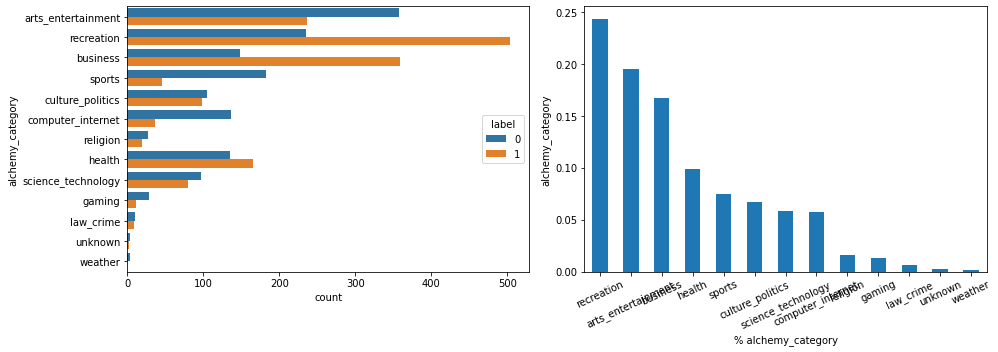

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

stats_target = df['alchemy_category'].value_counts(normalize=True)
print(stats_target)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=df,y='alchemy_category',hue='label')
plt.subplot(1,2,2)
stats_target.plot.bar(rot=25)
plt.ylabel('alchemy_category')
plt.xlabel('% alchemy_category')
plt.tight_layout()
plt.show()

# 2. "Page_Description" & "link"

In [12]:
#Page_description column 
df["page_description"]

0       {"url":"cbc ca stevenandchris 2012 11 peggy ks...
1       {"title":"Vegan Potato Spinach Balls Fat Free ...
2       {"title":"Toshiba shows an ultra thin flexible...
3       {"url":"collegehumor videos playlist 6472556 e...
4       {"title":"Shaq admits to taking performance en...
                              ...                        
4432    {"title":"VIDEO Fauja Singh 100 Finishes a Mar...
4433    {"title":"Coconut Granola Tasty Kitchen Blog "...
4434    {"title":"Parallels H Sphere Account has been ...
4435    {"url":"huffingtonpost 2012 10 12 pumpkin seed...
4436    {"title":"Bike Parkour Is The Only Parkour Bro...
Name: page_description, Length: 4437, dtype: object

In [13]:
#Converting page_description column into lowercase
df['pd_lower']= df['page_description'].apply(lambda x: x.lower())


In [14]:
df['pd_lower']

0       {"url":"cbc ca stevenandchris 2012 11 peggy ks...
1       {"title":"vegan potato spinach balls fat free ...
2       {"title":"toshiba shows an ultra thin flexible...
3       {"url":"collegehumor videos playlist 6472556 e...
4       {"title":"shaq admits to taking performance en...
                              ...                        
4432    {"title":"video fauja singh 100 finishes a mar...
4433    {"title":"coconut granola tasty kitchen blog "...
4434    {"title":"parallels h sphere account has been ...
4435    {"url":"huffingtonpost 2012 10 12 pumpkin seed...
4436    {"title":"bike parkour is the only parkour bro...
Name: pd_lower, Length: 4437, dtype: object

In [15]:
# #Retaining only alphabetic words
# import re
# re.sub("[\W,\d]"," ",df['pd_lower'][0])

In [16]:
#Removing special characters using regex 
import re
def special_rem(text):
  spec = re.sub("[\W,\d]"," ",text)
  return spec

#applying the above function to column to df['pd_lower']
df['pd_spec_rem'] = df["pd_lower"].apply(lambda x: special_rem(x))
df['link_new'] = df["link"].apply(lambda x: special_rem(x))

In [17]:
df['pd_spec_rem']

0         url   cbc ca stevenandchris         peggy ks...
1         title   vegan potato spinach balls fat free ...
2         title   toshiba shows an ultra thin flexible...
3         url   collegehumor videos playlist         e...
4         title   shaq admits to taking performance en...
                              ...                        
4432      title   video fauja singh     finishes a mar...
4433      title   coconut granola tasty kitchen blog  ...
4434      title   parallels h sphere account has been ...
4435      url   huffingtonpost            pumpkin seed...
4436      title   bike parkour is the only parkour bro...
Name: pd_spec_rem, Length: 4437, dtype: object

In [18]:
df['link_new']

0       http   www cbc ca stevenandchris         peggy...
1       http   www instructables com id Vegan Baked Po...
2       http   www oled info com toshiba shows ultra t...
3       http   www collegehumor com videos playlist   ...
4       http   sports yahoo com nba blog ball_dont_lie...
                              ...                        
4432    http   newsfeed time com            a     year...
4433    http   tastykitchen com blog         coconut g...
4434    http   ecoble com              offbeat off the...
4435    http   www huffingtonpost com            pumpk...
4436    http   www bromygod com            bike parkou...
Name: link_new, Length: 4437, dtype: object

In [19]:
#FRequency distribution plot of page_description column post tokenization
import nltk
from nltk.probability import FreqDist
def frequency_dist(s):
    for i in range(len(s)):
        tokens = nltk.tokenize.word_tokenize(s[i])
        #print(tokens)

        fdist1 = FreqDist(tokens)
        fdist1.plot(20, cumulative=True)
pd_freq_dist = list(df['pd_spec_rem'][0:3])
link_dist = list(df['link_new'][0:3])

In [20]:
#frequency_dist(pd_freq_dist)

In [21]:
#frequency_dist(link_dist)

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
# import re
# def tokenization(text):
#     tokens = re.split('W+',text)
#     return tokens
# #applying function to the column
# df['pd_tokens']= df['pd_spec_rem'].apply(lambda x: tokenization(x))
# df['link_tokens'] = df['link_new'].apply(lambda x: tokenization(x))

In [24]:
#page_description
l = []
for ele in df['pd_spec_rem']:
    l.append(ele.split())


In [25]:
#link
l1 = []
for ele in df['link_new']:
    l1.append(ele.split())


In [26]:
#page_description
for ele in df['pd_spec_rem']:
    ele = ele.split()
    
print(df['pd_spec_rem'][0])

  url   cbc ca stevenandchris         peggy ks sexy mood boosting cupcakes html   title   steven and chris peggy k s sexy mood boosting cupcakes peggy k s sexy mood boosting cupcakes from steven and chris   body   if you re ready to give your libido a boost with a sweet treat then you re going to want to try peggy k s sexy mood boosting cupcakes wet ingredients   tablespoon ground chia mixed with     cup water      ripe banana  tablespoons coconut oil u  bd cup walnut butter   teaspoon s vanilla extract  cup almond milk  u  bd cup coconut sugar dry ingredients   cup brown rice flour u  bd cup cooked quinoa   tablespoon maca powder    cup cocoa powder  teaspoon baking powder  teaspoon non aluminum baking soda u  bd teaspoon saltchopped walnuts raspberry frosting   cups raw cashews    cup maple syrup   cups raspberries almond milk for the cupcakes preheat the oven to     f place ground chia in a small bowl add warm water and mix with a fork set aside for gel to form mash banana in large 

In [27]:
#link
for ele in df['link_new']:
    ele = ele.split()
    
print(df['link_new'][0])

http   www cbc ca stevenandchris         peggy ks sexy mood boosting cupcakes html


In [28]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

In [29]:
nltk.download('words')
#unusual_words(l[56])

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [30]:
from nltk.corpus import stopwords

In [31]:
#stopwords.words('english')

In [32]:
def relevant_content(text):
    new_list = []
    stopwords = nltk.corpus.stopwords.words('english')
    for i in range(len(l)):
        a = []
        for word in l[i]:
            if word not in stopwords:
                 a.append(word)
        new_list.append(set(a))
    return new_list

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
r_c = relevant_content(l)
print(r_c[87])

{'teaspoon', 'title', 'seeded', 'spray', 'fat', 'shredded', 'cup', 'copyright', 'occasionally', 'enchiladas', 'make', 'teaspoons', 'warmed', 'cooked', 'traditionally', 'minutes', 'ahead', 'filling', 'along', 'stir', 'flour', 'stick', 'dish', 'great', 'f', 'x', 'large', 'wine', 'tortillas', 'grain', 'salsa', 'part', 'cooking', 'turn', 'heat', 'oven', 'soften', 'juices', 'leaves', 'begin', 'uncovered', 'recipe', 'preheat', 'cheese', 'oil', 'wrap', 'gently', 'clove', 'baked', 'lay', 'coat', 'oregano', 'download', 'garlic', 'ingredients', 'tortilla', 'inside', 'mixture', 'url', 'rose', 'mix', 'serves', 'u', 'seam', 'baby', 'breasts', 'meal', 'gew', 'white', 'small', 'cups', 'warm', 'chile', 'green', 'skim', 'begins', 'tops', 'iserloh', 'savory', 'version', 'serving', 'set', 'chopped', 'juice', 'recipes', 'aside', 'side', 'directions', 'chicken', 'image', 'whole', 'spoon', 'bake', 'baking', 'jennifer', 'jalape', 'olive', 'mozarella', 'dipped', 'cook', 'yellow', 'pairings', 'brown', 'tortill

In [35]:
r_c1 = relevant_content(l1)
print(r_c1[87])

{'teaspoon', 'title', 'seeded', 'spray', 'fat', 'shredded', 'cup', 'copyright', 'occasionally', 'enchiladas', 'make', 'teaspoons', 'warmed', 'cooked', 'traditionally', 'minutes', 'ahead', 'filling', 'along', 'stir', 'flour', 'stick', 'dish', 'great', 'f', 'x', 'large', 'wine', 'tortillas', 'grain', 'salsa', 'part', 'cooking', 'turn', 'heat', 'oven', 'soften', 'juices', 'leaves', 'begin', 'uncovered', 'recipe', 'preheat', 'cheese', 'oil', 'wrap', 'gently', 'clove', 'baked', 'lay', 'coat', 'oregano', 'download', 'garlic', 'ingredients', 'tortilla', 'inside', 'mixture', 'url', 'rose', 'mix', 'serves', 'u', 'seam', 'baby', 'breasts', 'meal', 'gew', 'white', 'small', 'cups', 'warm', 'chile', 'green', 'skim', 'begins', 'tops', 'iserloh', 'savory', 'version', 'serving', 'set', 'chopped', 'juice', 'recipes', 'aside', 'side', 'directions', 'chicken', 'image', 'whole', 'spoon', 'bake', 'baking', 'jennifer', 'jalape', 'olive', 'mozarella', 'dipped', 'cook', 'yellow', 'pairings', 'brown', 'tortill

In [36]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [37]:
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].lower()
    tag_dict = {"a": wordnet.ADJ,
                "n": wordnet.NOUN,
                "v": wordnet.VERB,
                "r": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [38]:
# from nltk.corpus import wordnet
# import nltk
# lemmatizer = WordNetLemmatizer()
# def get_wordnet_pos(word):
#     """Map POS tag to first character lemmatize() accepts"""
#     tag = nltk.pos_tag([word])[0][1][0].lower()
#     tag_dict = {"a": wordnet.ADJ,
#                 "n": wordnet.NOUN,
#                 "v": wordnet.VERB,
#                 "r": wordnet.ADV}
#     return tag_dict.get(tag, wordnet.NOUN)

In [39]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [40]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [41]:
nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [42]:
#Lemmatization for page description 

lemmetized_content = []
for ele in r_c:
    x =[]
    for w in ele:
        x.append(lemmatizer.lemmatize(w, pos=get_wordnet_pos(w)))
    lemmetized_content.append(x)
#print(lemmetized_content[0])

In [43]:
#Lemmatization for link

lemmetized_content1 = []
for ele in r_c1:
    x =[]
    for w in ele:
        x.append(lemmatizer.lemmatize(w, pos=get_wordnet_pos(w)))
    lemmetized_content1.append(x)
print(lemmetized_content1[0])

['toothpick', 'pipe', 'teaspoon', 'title', 'wet', 'saltchopped', 'sugar', 'entertain', 'raspberry', 'form', 'gel', 'fork', 'incorporate', 'health', 'powder', 'walnut', 'cup', 'life', 'try', 'peggy', 'bowl', 'walnut', 'cooked', 'milk', 'minute', 'maca', 'stevenandchris', 'cocoa', 'ready', 'stir', 'mood', 'flour', 'k', 'pip', 'finance', 'soda', 'f', 'boost', 'large', 'non', 'whether', 'thick', 'boost', 'cooking', 'tablespoon', 'frost', 'oven', 'aluminum', 'smooth', 'preheat', 'mini', 'oil', 'grease', 'nut', 'ca', 'sexy', 'rubber', 'splash', 'coconut', 'html', 'ingredient', 'dry', 'almond', 'bag', 'butter', 'url', 'mix', 'u', 'mash', 'come', 'power', 'beauty', 'rest', 'well', 'cupcake', 'raw', 'blender', 'cbc', 'banana', 'small', 'fabulous', 'cup', 'go', 'warm', 'decor', 'quinoa', 'maple', 'mixed', 'cashew', 'give', 'libido', 'set', 'muffin', 'blend', 'ripe', 'rice', 'chris', 'k', 'aside', 'syrup', 'raspberry', 'ground', 'bake', 'baking', 'relationship', 'want', 'transfer', 'brown', 'stev

In [44]:
print(len(lemmetized_content[67]))

8


In [45]:
print(len(lemmetized_content1[67]))

8


In [46]:
df['page_description'] = [x for x in lemmetized_content]

In [47]:
df['link'] = [x for x in lemmetized_content1]

In [48]:
df.head()

,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label,pd_lower,pd_spec_rem,link_new
0,"[toothpick, pipe, teaspoon, title, wet, saltch...",7426,"[toothpick, pipe, teaspoon, title, wet, saltch...",arts_entertainment,0.471752,1.725275,0.469388,0.204082,0.112245,0.010204,...,0,1236,98,8,0.061224,0.076125,1,"{""url"":""cbc ca stevenandchris 2012 11 peggy ks...",url cbc ca stevenandchris peggy ks...,http www cbc ca stevenandchris peggy...
1,"[also, title, evt, fat, excuse, regular, prev,...",8430,"[also, title, evt, fat, excuse, regular, prev,...",recreation,0.885088,0.847134,0.134783,0.043478,0.021739,0.000000,...,0,3887,230,8,0.330435,0.130742,1,"{""title"":""vegan potato spinach balls fat free ...",title vegan potato spinach balls fat free ...,http www instructables com id Vegan Baked Po...
2,"[title, interest, ultra, color, start, product...",3469,"[title, interest, ultra, color, start, product...",business,0.716379,2.613333,0.546667,0.293333,0.160000,0.120000,...,0,780,75,8,0.160000,0.076471,0,"{""title"":""toshiba shows an ultra thin flexible...",title toshiba shows an ultra thin flexible...,http www oled info com toshiba shows ultra t...
3,"[dollar, pay, url, fails, title, watch, bigges...",1326,"[dollar, pay, url, fails, title, watch, bigges...",arts_entertainment,0.562999,1.434286,0.369792,0.088542,0.000000,0.000000,...,0,2388,192,6,0.005208,0.090909,0,"{""url"":""collegehumor videos playlist 6472556 e...",url collegehumor videos playlist e...,http www collegehumor com videos playlist ...
4,"[title, rumor, lie, basketball, take, body, co...",3580,"[title, rumor, lie, basketball, take, body, co...",sports,0.893246,1.781333,0.530713,0.208845,0.071253,0.019656,...,0,5020,407,11,0.299754,0.093023,0,"{""title"":""shaq admits to taking performance en...",title shaq admits to taking performance en...,http sports yahoo com nba blog ball_dont_lie...


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4437 entries, 0 to 4436
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   link                                4437 non-null   object 
 1   link_id                             4437 non-null   int64  
 2   page_description                    4437 non-null   object 
 3   alchemy_category                    3040 non-null   object 
 4   alchemy_category_score              3040 non-null   object 
 5   avg_link_size                       4437 non-null   float64
 6   common_word_link_ratio_1            4437 non-null   float64
 7   common_word_link_ratio_2            4437 non-null   float64
 8   common_word_link_ratio_3            4437 non-null   float64
 9   common_word_link_ratio_4            4437 non-null   float64
 10  compression_ratio                   4437 non-null   float64
 11  embed_ratio                         4437 no

In [50]:
df.isna().sum()

link                                     0
link_id                                  0
page_description                         0
alchemy_category                      1397
alchemy_category_score                1397
avg_link_size                            0
common_word_link_ratio_1                 0
common_word_link_ratio_2                 0
common_word_link_ratio_3                 0
common_word_link_ratio_4                 0
compression_ratio                        0
embed_ratio                              0
frame_based                              0
frame_tag_ratio                          0
has_domain_link                          0
html_ratio                               0
image_ratio                              0
is_news                               1688
lengthy_link_domain                      0
link_word_score                          0
news_front_page                        727
non_markup_alphanumeric_characters       0
count_of_links                           0
number_of_w

In [51]:
#df.duplicated().sum()

In [52]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def wordcloud_relevant(lemmetized_content):
    for i in range(len(lemmetized_content)):
        comment_words = ''
        comment_words += " ".join(lemmetized_content[i])+" "
        stopwords = set(STOPWORDS)
        wordcloud = WordCloud(width = 400, height = 400,
                        background_color ='white',
                        stopwords = stopwords,
                        min_font_size = 10).generate(comment_words)

        # plot the WordCloud image                      
        plt.figure(figsize = (4, 4), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)

        plt.show()

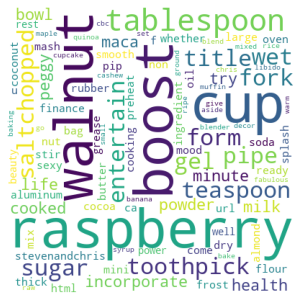

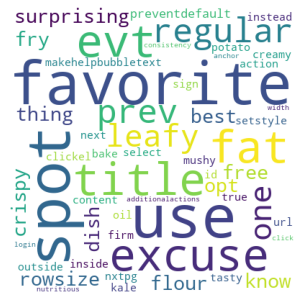

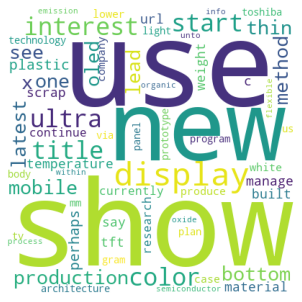

In [53]:
#wordcloud for page description column
wordcloud_relevant(lemmetized_content[0:3])

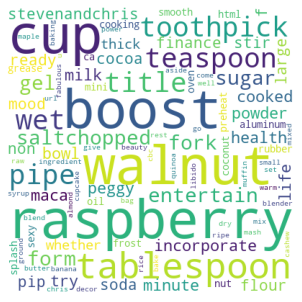

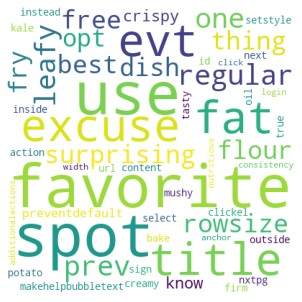

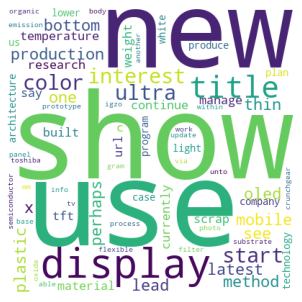

In [54]:
#wordcloud for link column
wordcloud_relevant(lemmetized_content1[0:3])

In [55]:
#Categorical features 
cat_features=[feature for feature in df.columns if df[feature].dtypes=='object']

In [56]:
cat_features

['link',
 'page_description',
 'alchemy_category',
 'alchemy_category_score',
 'is_news',
 'news_front_page',
 'pd_lower',
 'pd_spec_rem',
 'link_new']

In [57]:
#Numerical Features 
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']

In [58]:
numerical_features

['link_id',
 'avg_link_size',
 'common_word_link_ratio_1',
 'common_word_link_ratio_2',
 'common_word_link_ratio_3',
 'common_word_link_ratio_4',
 'compression_ratio',
 'embed_ratio',
 'frame_based',
 'frame_tag_ratio',
 'has_domain_link',
 'html_ratio',
 'image_ratio',
 'lengthy_link_domain',
 'link_word_score',
 'non_markup_alphanumeric_characters',
 'count_of_links',
 'number_of_words_in_url',
 'parametrized_link_ratio',
 'spelling_mistakes_ratio',
 'label']

In [59]:
### numerical variables- 2 Types
##1. Continuous variable and Discrete variable


###Discrete variables 
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<=25]
print(discrete_feature)

###Continuous Variables 
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print(continuous_feature)

['frame_based', 'has_domain_link', 'lengthy_link_domain', 'number_of_words_in_url', 'label']
['link_id', 'avg_link_size', 'common_word_link_ratio_1', 'common_word_link_ratio_2', 'common_word_link_ratio_3', 'common_word_link_ratio_4', 'compression_ratio', 'embed_ratio', 'frame_tag_ratio', 'html_ratio', 'image_ratio', 'link_word_score', 'non_markup_alphanumeric_characters', 'count_of_links', 'parametrized_link_ratio', 'spelling_mistakes_ratio']


In [60]:
df[discrete_feature].head()

,frame_based,has_domain_link,lengthy_link_domain,number_of_words_in_url,label
0,0,0,0,8,1
1,0,0,1,8,1
2,0,0,1,8,0
3,0,0,0,6,0
4,0,0,1,11,0


In [61]:
###Continuous Variables 

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print(len(continuous_feature))
print(continuous_feature)

16
['link_id', 'avg_link_size', 'common_word_link_ratio_1', 'common_word_link_ratio_2', 'common_word_link_ratio_3', 'common_word_link_ratio_4', 'compression_ratio', 'embed_ratio', 'frame_tag_ratio', 'html_ratio', 'image_ratio', 'link_word_score', 'non_markup_alphanumeric_characters', 'count_of_links', 'parametrized_link_ratio', 'spelling_mistakes_ratio']


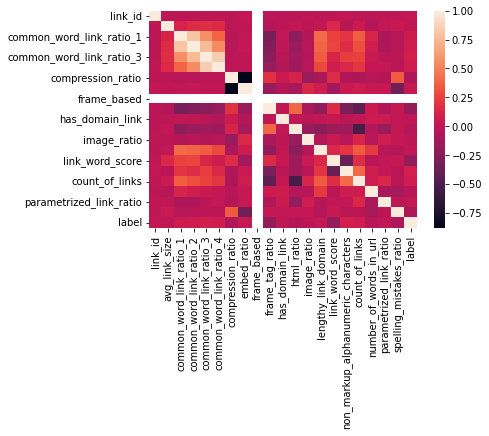

In [272]:
x = df[numerical_features].corr()
sns.heatmap(x)

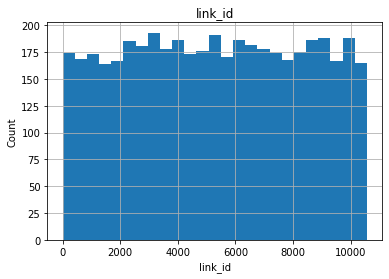

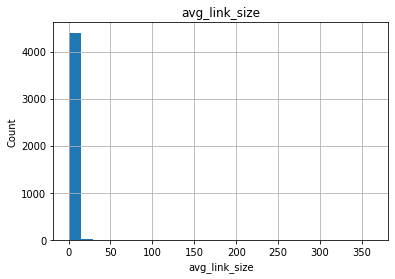

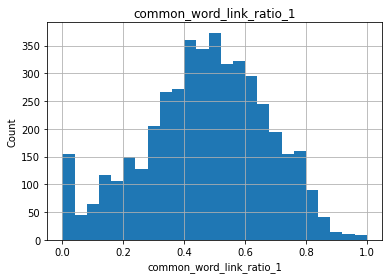

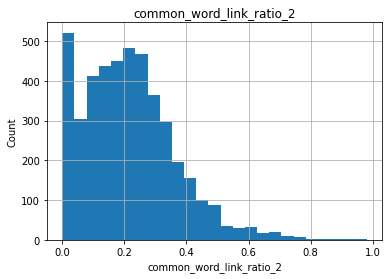

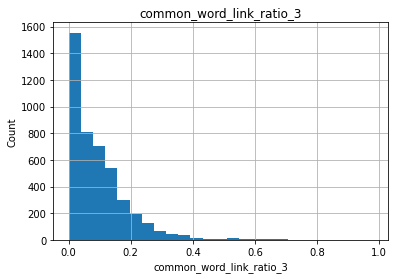

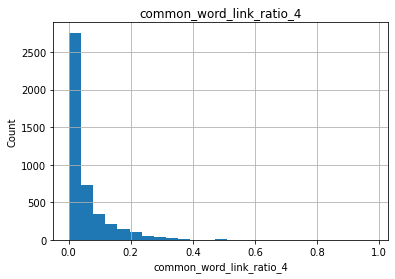

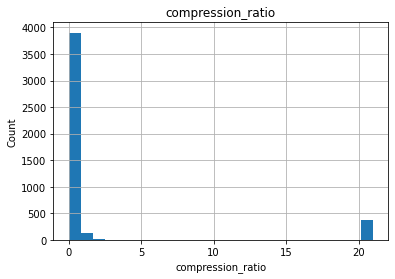

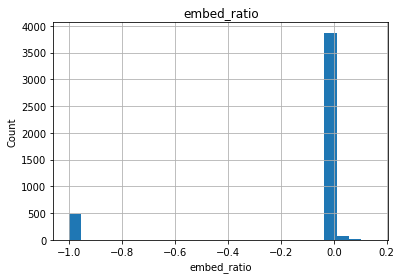

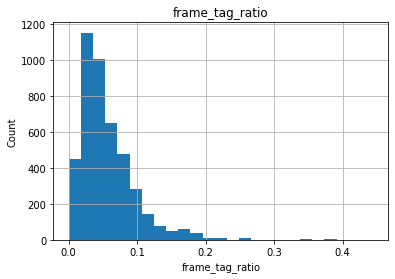

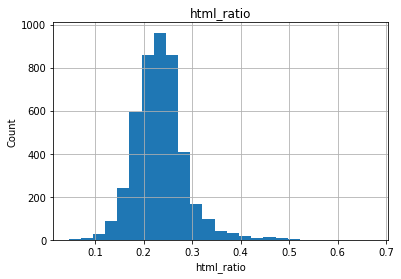

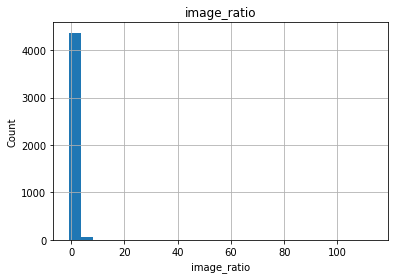

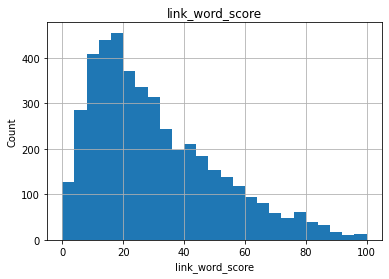

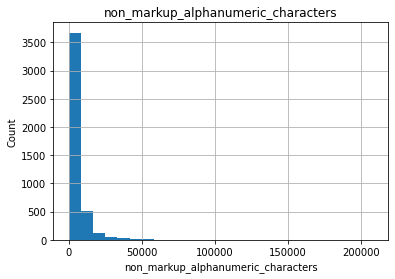

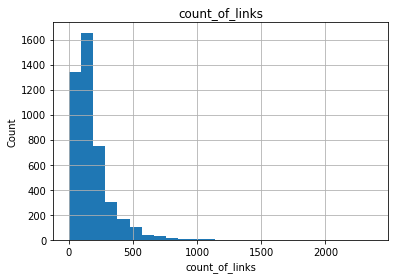

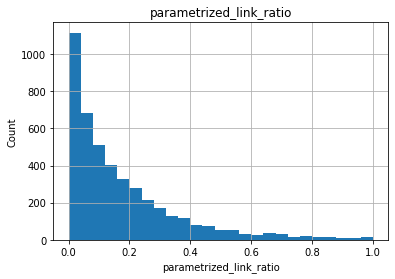

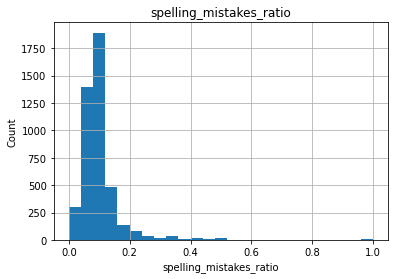

In [62]:
#Analyzing distribution of Continuous variables 

data=df.copy()
for feature in continuous_feature:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Text(0, 0.5, 'Frequency')

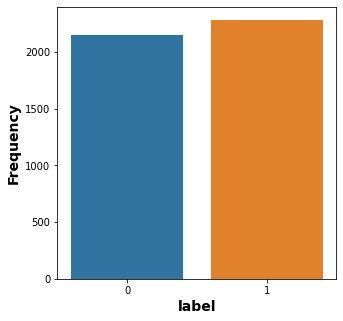

In [63]:
#Frequency plot 0 and 1 label

plt.figure(figsize=(5, 5))

sns.countplot(x='label', data=df)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('plot_bioactivity_class.pdf')

# EDA & Data transformation of Continuous variables 

In [64]:
#Class for normalization
class MinMaxScaler:
    def __init__(self, minimum_elem, maximum_elem):
        self.minimum_elem = minimum_elem 
        self.maximum_elem = maximum_elem 
    
    def scale(self, x):
        return (x - self.minimum_elem)/(self.maximum_elem - self.minimum_elem)

In [65]:
#Class for standardization 

class Standardizer: 
    def __init__(self, mean, stdev):
        self.mean = mean 
        self.stdev = stdev
    def scale(self, x):
        return (x - self.mean)/self.stdev

# 3. 'avg_link_size'

In [66]:
#3. 'avg_link_size' : Tells the number of words in a webpage

Text(0, 0.5, 'avg_link_size')

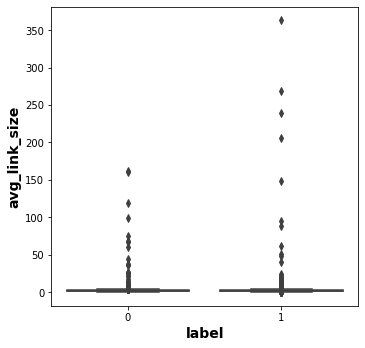

In [67]:
#'avg_link_size' distribution wrt label

plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='avg_link_size', data = df)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('avg_link_size', fontsize=14, fontweight='bold')


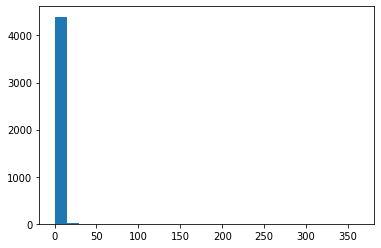

In [68]:
plt.hist(df["avg_link_size"], bins=25)
plt.show()

In [69]:
#Outlier removal

max_thresh = df['avg_link_size'].quantile(0.95)

#The values above 4.28 will be considered as an outlier 

In [70]:
df[df['avg_link_size']>4.28]


,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label,pd_lower,pd_spec_rem,link_new
24,"[grand, drive, title, note, give, today, girlf...",2148,"[grand, drive, title, note, give, today, girlf...",NaN,NaN,9.954545,0.514196,0.375394,0.331230,0.119874,...,NaN,9639,317,2,0.741325,0.088889,0,"{""title"":""shaq rode in my lude "",""body"":""hey i...",title shaq rode in my lude body hey i...,http www honda tech com zerothread id
25,"[kapott, n, bio, title, rz, tud, amint, com, k...",3274,"[kapott, n, bio, title, rz, tud, amint, com, k...",computer_internet,0.847649,44.554054,0.885787,0.756345,0.637056,0.487310,...,0,2368,394,9,0.781726,0.325581,0,"{""title"":""jill bolte taylor dr\u00e1mai rohamo...",title jill bolte taylor dr u e mai rohamo...,http www ted com talks lang hun jill_bolte_t...
46,"[also, weed, favor, iron, beneficial, extract,...",7878,"[also, weed, favor, iron, beneficial, extract,...",health,0.444938,4.641026,0.773196,0.587629,0.257732,0.113402,...,0,12429,97,3,0.113402,0.096461,1,"{""title"":""the 19 healthiest foods you re proba...",title the healthiest foods you re proba...,http www budgetlife com blog healthiest foods
55,"[thanksgiving, also, teaspoon, title, noble, d...",8154,"[thanksgiving, also, teaspoon, title, noble, d...",NaN,NaN,4.633333,0.802632,0.426316,0.384211,0.255263,...,NaN,15718,380,5,0.268421,0.063425,1,"{""title"":""noble pig upside down apple pie upsi...",title noble pig upside down apple pie upsi...,http noblepig com upside down app...
59,"[also, bio, title, wholesome, lecture, art, co...",1351,"[also, bio, title, wholesome, lecture, art, co...",science_technology,0.478201,51.169492,0.877647,0.696471,0.470588,0.247059,...,0,1596,425,5,0.002353,0.054187,1,"{""title"":""peter reinhart on bread video on ted...",title peter reinhart on bread video on ted...,http www ted com talks peter_reinhart_on_bre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210,"[eco, title, professional, reputation, country...",264,"[eco, title, professional, reputation, country...",business,0.890395,4.418033,0.695187,0.454545,0.326203,0.240642,...,0,2337,187,0,0.010695,0.049808,1,"{""title"":""raw food diet classes recipes produc...",title raw food diet classes recipes produc...,http rawfoodchef com
4268,"[article, popular, url, title, college, fashio...",4627,"[article, popular, url, title, college, fashio...",NaN,NaN,4.782609,0.793478,0.597826,0.434783,0.282609,...,NaN,618,92,1,0.021739,0.142857,1,"{""url"":""collegefashion popular"",""title"":""most ...",url collegefashion popular title most ...,http www collegefashion net popular
4283,"[jalapeno, uppasta, maker, typespasta, freezet...",10009,"[jalapeno, uppasta, maker, typespasta, freezet...",recreation,0.141891,4.532389,0.931727,0.765060,0.500000,0.255020,...,0,169,498,1,0.054217,0.243622,1,"{""title"":""browse index startcooking com "",""bod...",title browse index startcooking com bod...,http startcooking com browse
4316,"[title, year, excellent, keep, couple, attempt...",6573,"[title, year, excellent, keep, couple, attempt...",arts_entertainment,0.423336,5.148148,0.706587,0.335329,0.203593,0.149701,...,0,2609,167,6,0.059880,0.135889,0,"{""title"":""the 50 best burgers in san francisco...",title the best burgers in san francisco...,http sanfrancisco grubstreet com ...


In [71]:
#Normalization

avg_norm = MinMaxScaler(df["avg_link_size"].min(),df["avg_link_size"].max())

In [72]:
df['avg_link_size'] = df['avg_link_size'].apply(avg_norm.scale)

In [73]:
df['avg_link_size']

0       0.004753
1       0.002334
2       0.007199
3       0.003951
4       0.004907
          ...   
4432    0.009414
4433    0.004696
4434    0.006887
4435    0.008532
4436    0.004556
Name: avg_link_size, Length: 4437, dtype: float64

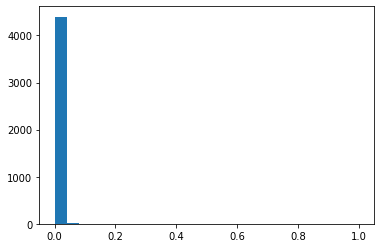

In [74]:
plt.hist(df["avg_link_size"], bins=25)
plt.show()

In [75]:
#Standardization 

avg_std = df["avg_link_size"].apply(Standardizer(df["avg_link_size"].mean(), df["avg_link_size"].std()).scale)  


In [76]:
df['avg_link_size'] = avg_std

In [77]:
max_threshold = df['avg_link_size'].quantile(0.95)

In [78]:
max_threshold

0.1395635194856354

In [79]:
min_threshold = df['avg_link_size'].quantile(0.05)

In [80]:
min_threshold

-0.19475253354588198

In [81]:
df[df['avg_link_size']<-0.19475253354588198]

,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label,pd_lower,pd_spec_rem,link_new
1,"[also, title, evt, fat, excuse, regular, prev,...",8430,"[also, title, evt, fat, excuse, regular, prev,...",recreation,0.885088,-0.201149,0.134783,0.043478,0.021739,0.000000,...,0,3887,230,8,0.330435,0.130742,1,"{""title"":""vegan potato spinach balls fat free ...",title vegan potato spinach balls fat free ...,http www instructables com id Vegan Baked Po...
8,"[rabbit, also, grand, weekend, ice, weed, prep...",7130,"[rabbit, also, grand, weekend, ice, weed, prep...",recreation,0.476849,-0.267327,0.017241,0.000000,0.000000,0.000000,...,0,11183,116,2,0.008621,0.070362,1,"{""title"":""recipes for 2 recipes "",""body"":""basi...",title recipes for recipes body basi...,http www recipesfor com au recipe_listing
17,"[title, learnt, boil, scoop, powder, make, bow...",2294,"[title, learnt, boil, scoop, powder, make, bow...",business,0.391622,-0.197742,0.282609,0.065217,0.047826,0.021739,...,0,2258,230,2,0.352174,0.145631,1,"{""title"":""seasaltwithfood chocolate truffles ""...",title seasaltwithfood chocolate truffles ...,http www seasaltwithfood com chocola...
19,"[rear, afro, nearly, riot, look, l, oldie, one...",3157,"[rear, afro, nearly, riot, look, l, oldie, one...",arts_entertainment,0.895079,-0.213133,0.098958,0.067708,0.026042,0.020833,...,0,5528,192,7,0.421875,0.063321,1,"{""title"":""life magazine photos of women in the...",title life magazine photos of women in the...,http jezebel com the way we were lif...
52,"[davis, vida, title, edition, hannah, com, gui...",1756,"[davis, vida, title, edition, hannah, com, gui...",arts_entertainment,0.367203,-0.277802,0.000000,0.000000,0.000000,0.000000,...,0,329,80,4,0.087500,0.038760,0,"{""url"":""sportsillustrated cnn 2013 swimsuit mo...",url sportsillustrated cnn swimsuit mo...,http sportsillustrated cnn com _swimsuit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,"[asfavorite, title, professional, com, food, c...",2694,"[asfavorite, title, professional, com, food, c...",NaN,NaN,-0.215946,0.251366,0.196721,0.000000,0.000000,...,0,2897,183,3,0.185792,0.131579,1,"{""title"":""tastespotting tastespotting"",""body"":...",title tastespotting tastespotting body ...,http www tastespotting com search macarons
4406,"[also, bill, title, television, uh, make, com,...",6913,"[also, bill, title, television, uh, make, com,...",arts_entertainment,0.856219,-0.197475,0.097015,0.029851,0.000000,0.000000,...,0,3413,134,6,0.201493,0.087786,0,"{""url"":""sportsillustrated cnn nfl photos 1301 ...",url sportsillustrated cnn nfl photos ...,http sportsillustrated cnn com nfl photos ...
4416,"[obi, cartoon, sad, title, affair, character, ...",9671,"[obi, cartoon, sad, title, affair, character, ...",sports,0.781278,-0.233272,0.056000,0.032000,0.024000,0.008000,...,0,1166,125,9,0.072000,0.079470,1,"{""title"":""the 25 funniest sports headlines of ...",title the funniest sports headlines of ...,http superbooyah com index php Home Gallerie...
4418,"[title, quality, crop, part, guaranteed, shot,...",7275,"[title, quality, crop, part, guaranteed, shot,...",recreation,0.888233,-0.232487,0.140845,0.084507,0.000000,0.000000,...,0,2650,213,5,0.422535,0.083333,0,"{""title"":""amazing trick shots funny videos at ...",title amazing trick shots funny videos at ...,http www videobash com video_show amazing tr...


In [82]:
df[df['avg_link_size']>0.1395635194856354]

,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label,pd_lower,pd_spec_rem,link_new
24,"[grand, drive, title, note, give, today, girlf...",2148,"[grand, drive, title, note, give, today, girlf...",NaN,NaN,0.701261,0.514196,0.375394,0.331230,0.119874,...,NaN,9639,317,2,0.741325,0.088889,0,"{""title"":""shaq rode in my lude "",""body"":""hey i...",title shaq rode in my lude body hey i...,http www honda tech com zerothread id
25,"[kapott, n, bio, title, rz, tud, amint, com, k...",3274,"[kapott, n, bio, title, rz, tud, amint, com, k...",computer_internet,0.847649,4.129562,0.885787,0.756345,0.637056,0.487310,...,0,2368,394,9,0.781726,0.325581,0,"{""title"":""jill bolte taylor dr\u00e1mai rohamo...",title jill bolte taylor dr u e mai rohamo...,http www ted com talks lang hun jill_bolte_t...
46,"[also, weed, favor, iron, beneficial, extract,...",7878,"[also, weed, favor, iron, beneficial, extract,...",health,0.444938,0.174770,0.773196,0.587629,0.257732,0.113402,...,0,12429,97,3,0.113402,0.096461,1,"{""title"":""the 19 healthiest foods you re proba...",title the healthiest foods you re proba...,http www budgetlife com blog healthiest foods
55,"[thanksgiving, also, teaspoon, title, noble, d...",8154,"[thanksgiving, also, teaspoon, title, noble, d...",NaN,NaN,0.174007,0.802632,0.426316,0.384211,0.255263,...,NaN,15718,380,5,0.268421,0.063425,1,"{""title"":""noble pig upside down apple pie upsi...",title noble pig upside down apple pie upsi...,http noblepig com upside down app...
59,"[also, bio, title, wholesome, lecture, art, co...",1351,"[also, bio, title, wholesome, lecture, art, co...",science_technology,0.478201,4.785055,0.877647,0.696471,0.470588,0.247059,...,0,1596,425,5,0.002353,0.054187,1,"{""title"":""peter reinhart on bread video on ted...",title peter reinhart on bread video on ted...,http www ted com talks peter_reinhart_on_bre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210,"[eco, title, professional, reputation, country...",264,"[eco, title, professional, reputation, country...",business,0.890395,0.152674,0.695187,0.454545,0.326203,0.240642,...,0,2337,187,0,0.010695,0.049808,1,"{""title"":""raw food diet classes recipes produc...",title raw food diet classes recipes produc...,http rawfoodchef com
4268,"[article, popular, url, title, college, fashio...",4627,"[article, popular, url, title, college, fashio...",NaN,NaN,0.188798,0.793478,0.597826,0.434783,0.282609,...,NaN,618,92,1,0.021739,0.142857,1,"{""url"":""collegefashion popular"",""title"":""most ...",url collegefashion popular title most ...,http www collegefashion net popular
4283,"[jalapeno, uppasta, maker, typespasta, freezet...",10009,"[jalapeno, uppasta, maker, typespasta, freezet...",recreation,0.141891,0.164005,0.931727,0.765060,0.500000,0.255020,...,0,169,498,1,0.054217,0.243622,1,"{""title"":""browse index startcooking com "",""bod...",title browse index startcooking com bod...,http startcooking com browse
4316,"[title, year, excellent, keep, couple, attempt...",6573,"[title, year, excellent, keep, couple, attempt...",arts_entertainment,0.423336,0.225018,0.706587,0.335329,0.203593,0.149701,...,0,2609,167,6,0.059880,0.135889,0,"{""title"":""the 50 best burgers in san francisco...",title the best burgers in san francisco...,http sanfrancisco grubstreet com ...


In [83]:
#Outlier Removal
df1 = df[(df['avg_link_size']<max_threshold) & (df['avg_link_size']>min_threshold)]

In [84]:
df1.shape

(3990, 30)

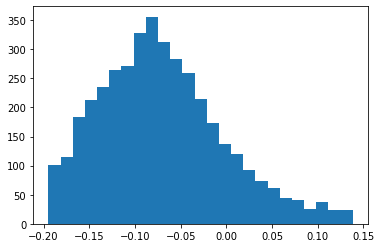

In [85]:
plt.hist(df1["avg_link_size"], bins=25)
plt.show()

# **2. common_word_link_ratio_1**

In [86]:
#common_word_link_ratio_1:

In [87]:
df1['common_word_link_ratio_1']

0       0.469388
2       0.546667
3       0.369792
4       0.530713
5       0.403509
          ...   
4432    0.630682
4433    0.506579
4434    1.000000
4435    0.678241
4436    0.317073
Name: common_word_link_ratio_1, Length: 3990, dtype: float64

Text(0, 0.5, 'common_word_link_ratio_1')

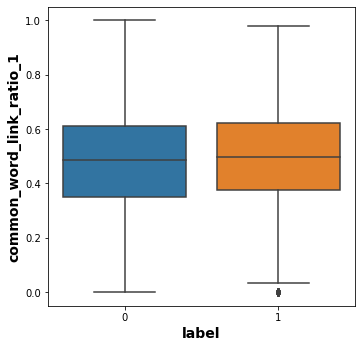

In [88]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='common_word_link_ratio_1', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('common_word_link_ratio_1', fontsize=14, fontweight='bold')

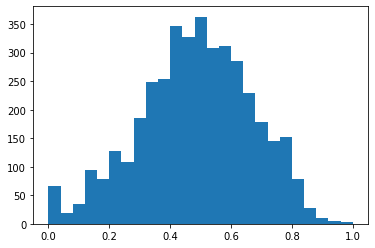

In [89]:
plt.hist(df1["common_word_link_ratio_1"], bins=25)
plt.show()

In [90]:
#Normalization
c1_norm = MinMaxScaler(df1["common_word_link_ratio_1"].min(),df1["common_word_link_ratio_1"].max())

In [91]:
df1['common_word_link_ratio_1'] = df1['common_word_link_ratio_1'].apply(c1_norm.scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
#Standardization
c1_std = df1["common_word_link_ratio_1"].apply(Standardizer(df1["common_word_link_ratio_1"].mean(), df1["common_word_link_ratio_1"].std()).scale)  


In [93]:
c1_std

0      -0.081762
2       0.336085
3      -0.620278
4       0.249821
5      -0.437970
          ...   
4432    0.790354
4433    0.119330
4434    2.787257
4435    1.047505
4436   -0.905327
Name: common_word_link_ratio_1, Length: 3990, dtype: float64

In [94]:
df1['common_word_link_ratio_1'] = c1_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
df1

,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label,pd_lower,pd_spec_rem,link_new
0,"[toothpick, pipe, teaspoon, title, wet, saltch...",7426,"[toothpick, pipe, teaspoon, title, wet, saltch...",arts_entertainment,0.471752,-0.114138,-0.081762,0.204082,0.112245,0.010204,...,0,1236,98,8,0.061224,0.076125,1,"{""url"":""cbc ca stevenandchris 2012 11 peggy ks...",url cbc ca stevenandchris peggy ks...,http www cbc ca stevenandchris peggy...
2,"[title, interest, ultra, color, start, product...",3469,"[title, interest, ultra, color, start, product...",business,0.716379,-0.026145,0.336085,0.293333,0.160000,0.120000,...,0,780,75,8,0.160000,0.076471,0,"{""title"":""toshiba shows an ultra thin flexible...",title toshiba shows an ultra thin flexible...,http www oled info com toshiba shows ultra t...
3,"[dollar, pay, url, fails, title, watch, bigges...",1326,"[dollar, pay, url, fails, title, watch, bigges...",arts_entertainment,0.562999,-0.142971,-0.620278,0.088542,0.000000,0.000000,...,0,2388,192,6,0.005208,0.090909,0,"{""url"":""collegehumor videos playlist 6472556 e...",url collegehumor videos playlist e...,http www collegehumor com videos playlist ...
4,"[title, rumor, lie, basketball, take, body, co...",3580,"[title, rumor, lie, basketball, take, body, co...",sports,0.893246,-0.108584,0.249821,0.208845,0.071253,0.019656,...,0,5020,407,11,0.299754,0.093023,0,"{""title"":""shaq admits to taking performance en...",title shaq admits to taking performance en...,http sports yahoo com nba blog ball_dont_lie...
5,"[ensures, ice, title, attach, cloud, track, ab...",3404,"[ensures, ice, title, attach, cloud, track, ab...",recreation,0.494102,-0.092225,-0.437970,0.087719,0.070175,0.017544,...,1,1127,57,0,0.017544,0.048387,0,"{""title"":""the farting cow of edinburgh "",""body...",title the farting cow of edinburgh body...,http www aboutcolonblank com p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,"[also, weekend, title, give, year, do, capture...",8318,"[also, weekend, title, give, year, do, capture...",sports,0.764237,0.053504,0.790354,0.238636,0.125000,0.079545,...,0,1519,176,10,0.238636,0.112760,0,"{""title"":""video fauja singh 100 finishes a mar...",title video fauja singh finishes a mar...,http newsfeed time com a year...
4433,"[like, teaspoon, title, leave, professional, p...",9697,"[like, teaspoon, title, leave, professional, p...",NaN,NaN,-0.116177,0.119330,0.177632,0.046053,0.000000,...,0,8767,152,3,0.026316,0.080820,1,"{""title"":""coconut granola tasty kitchen blog ""...",title coconut granola tasty kitchen blog ...,http tastykitchen com blog coconut g...
4434,"[invention, title, url, sphere, ecoble, grid, ...",4979,"[invention, title, url, sphere, ecoble, grid, ...",culture_politics,0.159831,-0.037374,2.787257,0.500000,0.250000,0.000000,...,0,82,4,8,0.000000,0.133333,0,"{""title"":""parallels h sphere account has been ...",title parallels h sphere account has been ...,http ecoble com offbeat off the...
4435,"[celebs, n, also, title, lantern, jack, pumpki...",2308,"[celebs, n, also, title, lantern, jack, pumpki...",culture_politics,0.84594,0.021801,1.047505,0.266204,0.085648,0.048611,...,NaN,7637,432,3,0.229167,0.129252,1,"{""url"":""huffingtonpost 2012 10 12 pumpkin seed...",url huffingtonpost pumpkin seed...,http www huffingtonpost com pumpk...


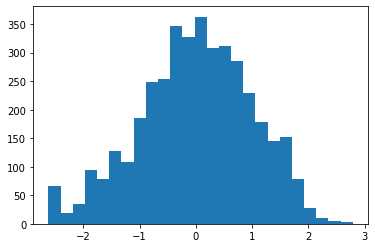

In [96]:
plt.hist(df1["common_word_link_ratio_1"], bins=25)
plt.show()

# 4. common_word_link_ratio_2

In [97]:
df1['common_word_link_ratio_2']

0       0.204082
2       0.293333
3       0.088542
4       0.208845
5       0.087719
          ...   
4432    0.238636
4433    0.177632
4434    0.500000
4435    0.266204
4436    0.109756
Name: common_word_link_ratio_2, Length: 3990, dtype: float64

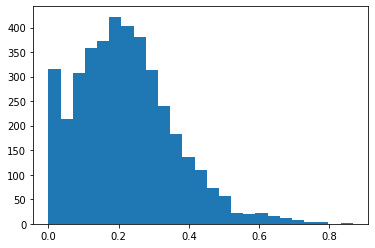

In [98]:
plt.hist(df1["common_word_link_ratio_2"], bins=25)
plt.show()

Text(0, 0.5, 'common_word_link_ratio_2')

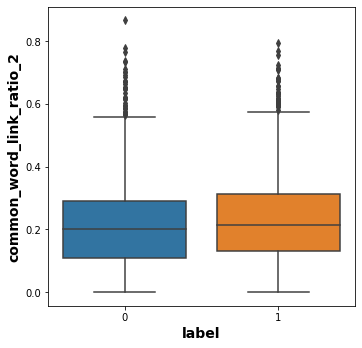

In [99]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='common_word_link_ratio_2', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('common_word_link_ratio_2', fontsize=14, fontweight='bold')

In [100]:
df1['common_word_link_ratio_2'].describe()

count    3990.000000
mean        0.219873
std         0.137512
min         0.000000
25%         0.119527
50%         0.208573
75%         0.300352
max         0.866667
Name: common_word_link_ratio_2, dtype: float64

In [101]:
#Normalization
c2_norm = MinMaxScaler(df1["common_word_link_ratio_2"].min(),df1["common_word_link_ratio_2"].max())
df1['common_word_link_ratio_2'] = df1['common_word_link_ratio_2'].apply(c2_norm.scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
#Standardization

c2_std = df1["common_word_link_ratio_2"].apply(Standardizer(df1["common_word_link_ratio_2"].mean(), df1["common_word_link_ratio_2"].std()).scale)  
df1['common_word_link_ratio_2'] = c2_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


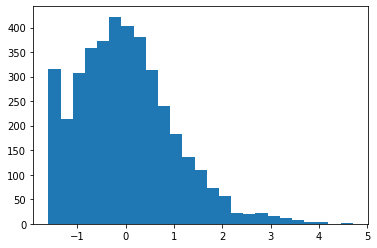

In [103]:
plt.hist(df1["common_word_link_ratio_2"], bins=25)
plt.show()

In [104]:
df1["common_word_link_ratio_2"].describe()

count    3.990000e+03
mean     1.117458e-16
std      1.000000e+00
min     -1.598941e+00
25%     -7.297271e-01
50%     -8.217234e-02
75%      5.852550e-01
max      4.703562e+00
Name: common_word_link_ratio_2, dtype: float64

In [105]:
df1["common_word_link_ratio_2"].skew()

0.6835030907686195

In [106]:
#LOg transformation 
import numpy as np

log_c2 = np.log(df1["common_word_link_ratio_2"])
print(log_c2.skew())

-1.379485284228086


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


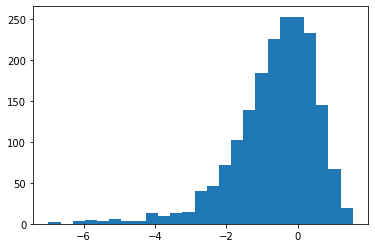

In [107]:
plt.hist(log_c2, bins=25)
plt.show()

In [108]:
#SQRT transformation
sqrt_c2 = np.sqrt(df1["common_word_link_ratio_2"])
print(sqrt_c2.skew())

0.4000079627957845


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


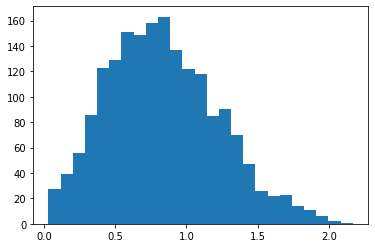

In [109]:
plt.hist(sqrt_c2, bins=25)
plt.show()

In [110]:
# #Box cox 
# pos = l[log_c2>0]
# from scipy import stats
# c2_boxcox = stats.boxcox(pos)
# plt.hist(c2_boxcox, bins=25)


In [111]:
df1["common_word_link_ratio_2"].max()

4.703561656384933

In [112]:
max = df1["common_word_link_ratio_2"].quantile(.95)
min = df1["common_word_link_ratio_2"].quantile(.05)

In [113]:
max

1.8123124746773864

In [114]:
#Outlier removal

In [115]:
#df1 = df1[(df1['common_word_link_ratio_2']<max) & (df1['common_word_link_ratio_2']>min)]

In [116]:
#df1

# 5. common_word_link_ratio_3

In [117]:
#common_word_link_ratio_3

df1["common_word_link_ratio_3"].value_counts()

0.000000    519
0.027027     23
0.111111     18
0.090909     17
0.062500     16
           ... 
0.097297      1
0.247222      1
0.218182      1
0.006536      1
0.085648      1
Name: common_word_link_ratio_3, Length: 2144, dtype: int64

Text(0, 0.5, 'common_word_link_ratio_3')

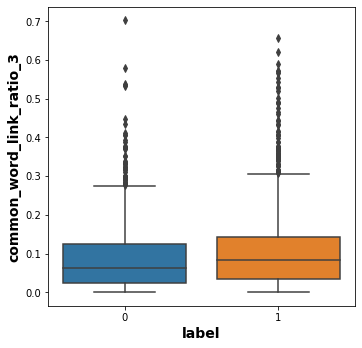

In [118]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='common_word_link_ratio_3', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('common_word_link_ratio_3', fontsize=14, fontweight='bold')

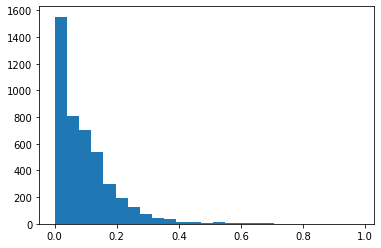

In [119]:
plt.hist(df["common_word_link_ratio_3"], bins=25)
plt.show()

In [120]:
#Normalization
c3_norm = MinMaxScaler(df1["common_word_link_ratio_3"].min(),df1["common_word_link_ratio_3"].max())
df1['common_word_link_ratio_3'] = df1['common_word_link_ratio_3'].apply(c3_norm.scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [121]:
#Standardization

c3_std = df1["common_word_link_ratio_3"].apply(Standardizer(df1["common_word_link_ratio_3"].mean(), df1["common_word_link_ratio_3"].std()).scale)  
df1['common_word_link_ratio_3'] = c3_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


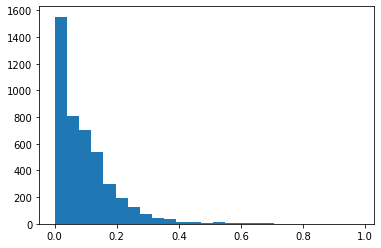

In [122]:
plt.hist(df["common_word_link_ratio_3"], bins=25)
plt.show()

In [123]:
#LOg transformation 
import numpy as np

log_c3 = np.log(df1["common_word_link_ratio_3"])
print(log_c3.skew())

-1.2261161832968464


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


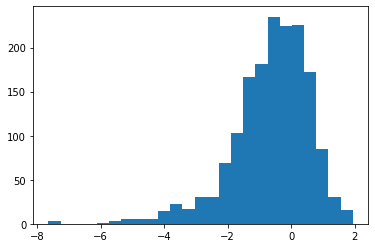

In [124]:
plt.hist(log_c3, bins=25)
plt.show()

In [125]:
#sqrt transformation 
import numpy as np

sqrt_c3 = np.sqrt(df1["common_word_link_ratio_3"])
print(sqrt_c3.skew())

0.7271044644625088


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


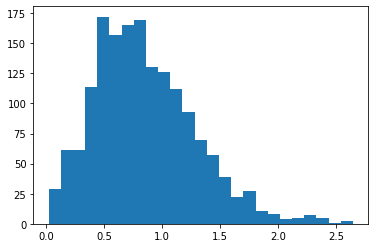

In [126]:
plt.hist(sqrt_c3, bins=25)
plt.show()

## **6. common_word_link_ratio_4**

In [127]:
#common_word_link_ratio_4

df1["common_word_link_ratio_4"].value_counts()

0.000000    1089
0.016129      13
0.014085      12
0.027778      12
0.016667      12
            ... 
0.067729       1
0.005405       1
0.089330       1
0.183544       1
0.111913       1
Name: common_word_link_ratio_4, Length: 1781, dtype: int64

Text(0, 0.5, 'common_word_link_ratio_4')

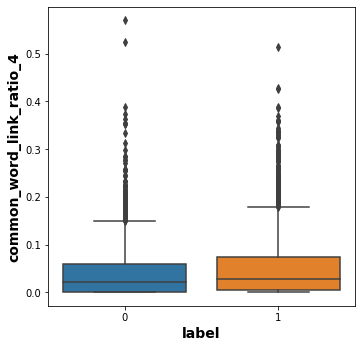

In [128]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='common_word_link_ratio_4', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('common_word_link_ratio_4', fontsize=14, fontweight='bold')

In [129]:
#Normalization
c4_norm = MinMaxScaler(df1["common_word_link_ratio_4"].min(),df1["common_word_link_ratio_4"].max())
df1['common_word_link_ratio_4'] = df1['common_word_link_ratio_4'].apply(c4_norm.scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [130]:
#Standardization

c4_std = df1["common_word_link_ratio_4"].apply(Standardizer(df1["common_word_link_ratio_4"].mean(), df1["common_word_link_ratio_4"].std()).scale)  
df1['common_word_link_ratio_4'] = c4_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


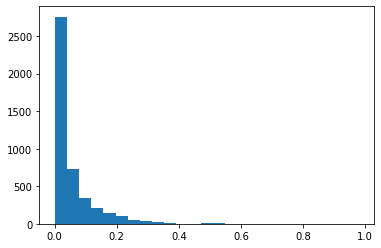

In [131]:
plt.hist(df["common_word_link_ratio_4"], bins=25)
plt.show()

In [132]:
#LOg transformation 
import numpy as np
log_c4 = np.log(df1["common_word_link_ratio_4"])
print(log_c4.skew())

-1.0449449448634984


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


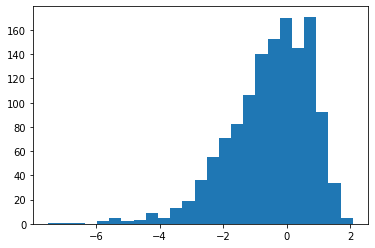

In [133]:
plt.hist(log_c4, bins=25)
plt.show()

In [134]:
#sqrt transformation 
import numpy as np
sqrt_c4 = np.sqrt(df1["common_word_link_ratio_4"])
print(sqrt_c4.skew())

0.5509711352879252


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


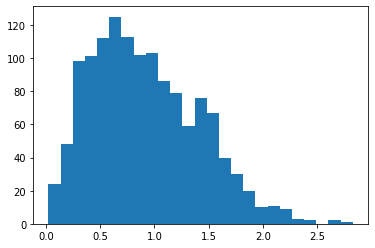

In [135]:
plt.hist(sqrt_c4, bins=25)
plt.show()

## **7. compression_ratio**

In [136]:
#compression_ratio

df1["compression_ratio"].value_counts()

21.000000    322
0.000000      22
0.609890       7
11.000000      5
0.596774       4
            ... 
0.447173       1
0.547368       1
0.542063       1
0.468238       1
0.664311       1
Name: compression_ratio, Length: 3550, dtype: int64

Text(0, 0.5, 'compression_ratio')

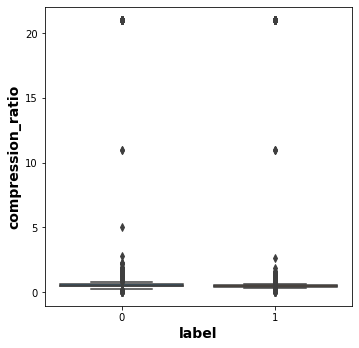

In [137]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='compression_ratio', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('compression_ratio', fontsize=14, fontweight='bold')

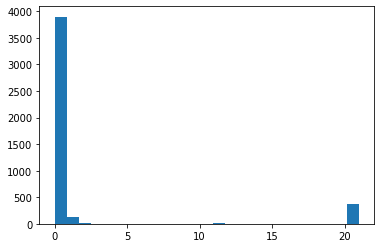

In [138]:
plt.hist(df["compression_ratio"], bins=25)
plt.show()

In [139]:
#Normalization
com_norm = MinMaxScaler(df1["compression_ratio"].min(),df1["compression_ratio"].max())
df1['compression_ratio'] = df1['compression_ratio'].apply(com_norm.scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [140]:
#Standardization

com_std = df1["compression_ratio"].apply(Standardizer(df1["compression_ratio"].mean(), df1["compression_ratio"].std()).scale)  
df1['compression_ratio'] = com_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


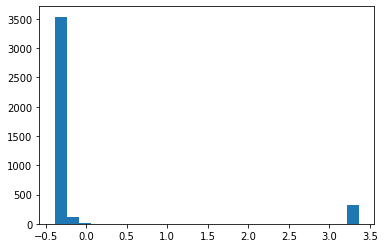

In [141]:
plt.hist(df1["compression_ratio"], bins=25)
plt.show()

In [142]:
#LOg transformation 
import numpy as np
log_cr = np.log(df1["compression_ratio"])
print(log_cr.skew())

-7.955851213945829


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


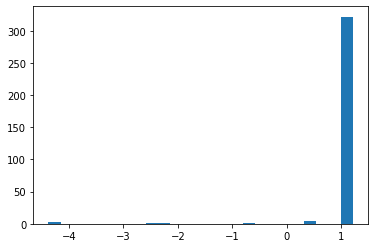

In [143]:
plt.hist(log_cr, bins=25)
plt.show()

In [144]:
#sqrt transformation 
import numpy as np
sqrt_cr = np.sqrt(df1["compression_ratio"])
print(sqrt_cr.skew())

-6.5713226791911294


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


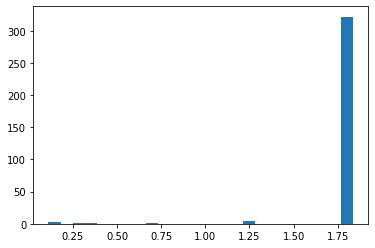

In [145]:
plt.hist(sqrt_cr, bins=25)
plt.show()

In [146]:
max = df1['compression_ratio'].quantile(0.95)
min = df1['compression_ratio'].quantile(0.05)

In [147]:
max

3.3654398350780035

In [148]:
min

-0.32213876072642705

In [149]:
df1['compression_ratio'].describe()

count    3.990000e+03
mean     1.958890e-17
std      1.000000e+00
min     -3.897579e-01
25%     -3.104296e-01
50%     -3.034517e-01
75%     -2.880640e-01
max      3.365440e+00
Name: compression_ratio, dtype: float64

In [150]:
#Outlier removal 

#df1 = df1[(df1['compression_ratio']<max) & (df1['compression_ratio']>min)]

In [151]:
#df1

In [152]:
# plt.hist(df1["compression_ratio"], bins=20)
# plt.show()

In [153]:
# plt.figure(figsize=(5.5,5.5))

# sns.boxplot(x='label', y='compression_ratio', data = df1)

# plt.xlabel('label', fontsize=14, fontweight='bold')
# plt.ylabel('compression_ratio', fontsize=14, fontweight='bold')

# 8. "embed_ratio"

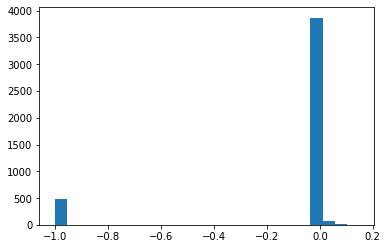

In [154]:
#embed_ratio
plt.hist(df["embed_ratio"], bins=25)
plt.show()

Text(0, 0.5, 'embed_ratio')

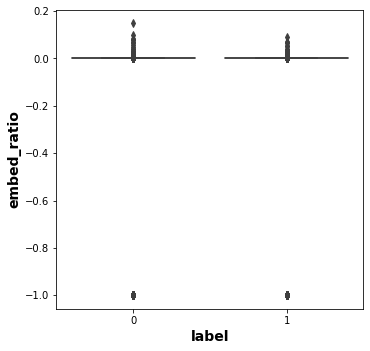

In [155]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='embed_ratio', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('embed_ratio', fontsize=14, fontweight='bold')

In [156]:
#Normalization
embed_norm = MinMaxScaler(df1["embed_ratio"].min(),df1["embed_ratio"].max())
df1['embed_ratio'] = df1['embed_ratio'].apply(embed_norm.scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [157]:
#Standardization

com_std = df1["embed_ratio"].apply(Standardizer(df1["embed_ratio"].mean(), df1["embed_ratio"].std()).scale)  
df1['embed_ratio'] = com_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


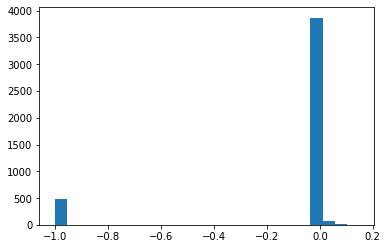

In [158]:
plt.hist(df["embed_ratio"], bins=25)
plt.show()

Text(0, 0.5, 'embed_ratio')

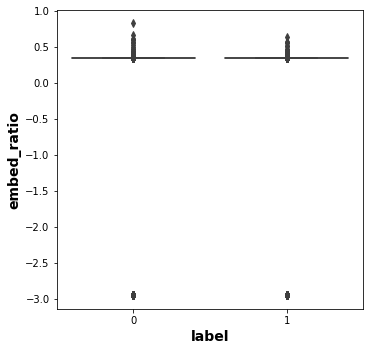

In [159]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='embed_ratio', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('embed_ratio', fontsize=14, fontweight='bold')

In [160]:
#Log transformation

import numpy as np
log_er = np.log(df1["embed_ratio"])
print(log_er.skew())

10.181808231645405


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


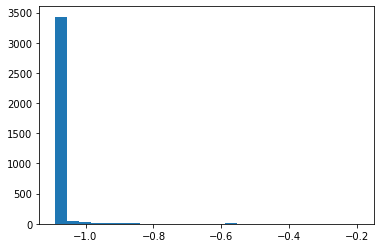

In [161]:
plt.hist(log_er, bins=25)
plt.show()

In [162]:
#Sqrt transformationspelling_mistakes_ratio

import numpy as np
sqrt_er = np.sqrt(df1["embed_ratio"])
print(sqrt_er.skew())

11.204139274216132


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


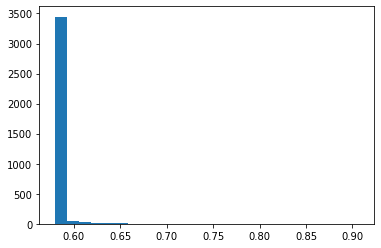

In [163]:
plt.hist(sqrt_er, bins=25)
plt.show()

# 9. "frame_based"

In [164]:
#frame_based

df1['frame_based'].value_counts()

0    3990
Name: frame_based, dtype: int64

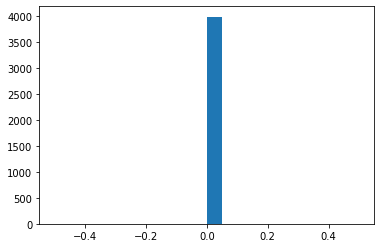

In [165]:
plt.hist(df1['frame_based'], bins=20)
plt.show()

Text(0, 0.5, 'frame_based')

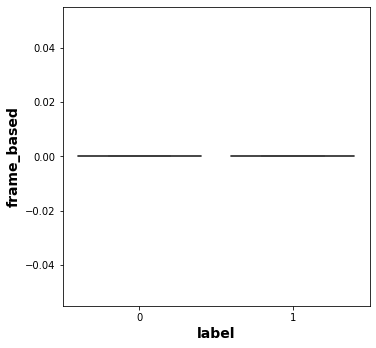

In [166]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='frame_based', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('frame_based', fontsize=14, fontweight='bold')

In [167]:
#df1.drop(df1['frame_based'])

# 10. "frame_tag_ratio"

In [168]:
df1['frame_tag_ratio'].value_counts()

0.023529    14
0.166667    13
0.000000    13
0.052632     7
0.034483     6
            ..
0.061294     1
0.033659     1
0.030240     1
0.061453     1
0.122222     1
Name: frame_tag_ratio, Length: 3510, dtype: int64

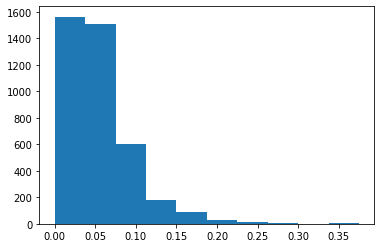

In [169]:
plt.hist(df1['frame_tag_ratio'])
plt.show()

Text(0, 0.5, 'frame_tag_ratio')

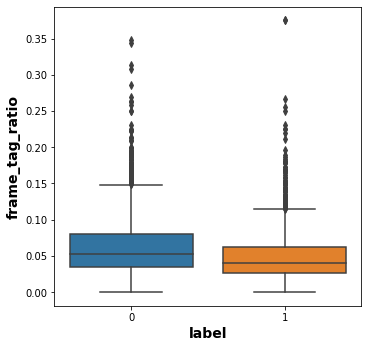

In [170]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='frame_tag_ratio', data = df1)
#spelling_mistakes_ratio
plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('frame_tag_ratio', fontsize=14, fontweight='bold')

In [171]:
#Normalization
frame_tag_norm = MinMaxScaler(df1["frame_tag_ratio"].min(),df1["frame_tag_ratio"].max())
df1['frame_tag_ratio'] = df1['frame_tag_ratio'].apply(frame_tag_norm.scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [172]:
#Standardization

frame_tag_std = df1["frame_tag_ratio"].apply(Standardizer(df1["frame_tag_ratio"].mean(), df1["frame_tag_ratio"].std()).scale)  
df1['frame_tag_ratio'] = frame_tag_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


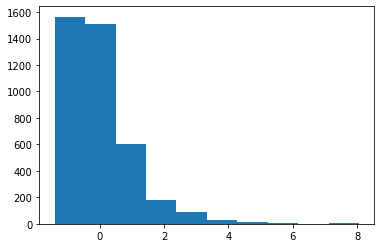

In [173]:
plt.hist(df1['frame_tag_ratio'])
plt.show()

In [174]:
#LOg transformation 
import numpy as np

log_ft = np.log(df1["frame_tag_ratio"])
print(log_ft.skew())

-1.0365489936016745


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [175]:
# plt.hist(log_ft)
# plt.show()

In [176]:
#sqrt transformation 
import numpy as np

sqrt_ft = np.sqrt(df1["frame_tag_ratio"])
print(sqrt_ft.skew())

0.8119362569039607


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


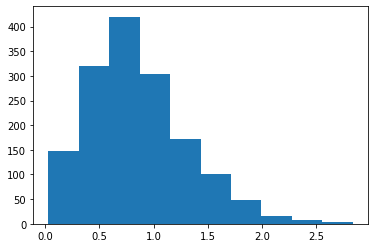

In [177]:
plt.hist(sqrt_ft)
plt.show()

# 11. html_ratio

In [178]:
#html_ratio

df1['html_ratio'].value_counts()

0.277981    6
0.278036    2
0.277926    2
0.267953    1
0.222737    1
           ..
0.253171    1
0.210555    1
0.094570    1
0.145823    1
0.260507    1
Name: html_ratio, Length: 3983, dtype: int64

(array([1.200e+01, 3.000e+02, 1.795e+03, 1.580e+03, 2.320e+02, 4.800e+01,
        1.800e+01, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([0.04556422, 0.10824918, 0.17093414, 0.23361909, 0.29630405,
        0.35898901, 0.42167397, 0.48435892, 0.54704388, 0.60972884,
        0.67241379]),
 <a list of 10 Patch objects>)

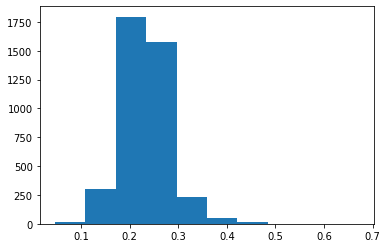

In [179]:
plt.hist(df1['html_ratio'])

Text(0, 0.5, 'html_ratio')

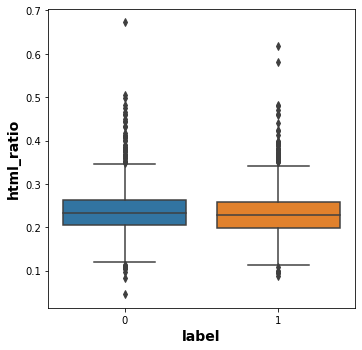

In [180]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='html_ratio', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('html_ratio', fontsize=14, fontweight='bold')

In [181]:
#Normalization
html_ratio_norm = MinMaxScaler(df1["html_ratio"].min(),df1["html_ratio"].max())
df1['html_ratio'] = df1['html_ratio'].apply(html_ratio_norm.scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [182]:
#Standardization

html_ratio_std = df1["html_ratio"].apply(Standardizer(df1["html_ratio"].mean(), df1["html_ratio"].std()).scale)  
df1['html_ratio'] = html_ratio_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(array([1.200e+01, 3.000e+02, 1.795e+03, 1.580e+03, 2.320e+02, 4.800e+01,
        1.800e+01, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([-3.81185513, -2.53766142, -1.2634677 ,  0.01072601,  1.28491973,
         2.55911345,  3.83330716,  5.10750088,  6.38169459,  7.65588831,
         8.93008202]),
 <a list of 10 Patch objects>)

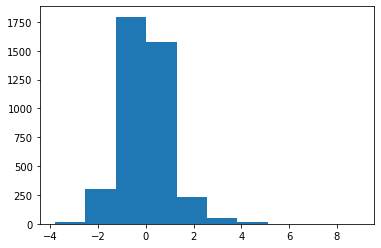

In [183]:
plt.hist(df1['html_ratio'])

Text(0, 0.5, 'html_ratio')

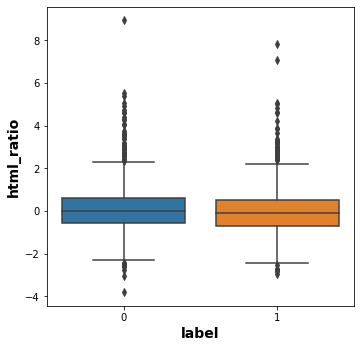

In [184]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='html_ratio', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('html_ratio', fontsize=14, fontweight='bold')

In [185]:
#LOg transformation

import numpy as np

log_html = np.log(df1["html_ratio"])
print(log_html.skew())

-1.1535932307732635


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([  2.,   0.,   1.,   8.,  36., 125., 352., 887., 430.,  53.]),
 array([-8.97664564, -7.86003852, -6.7434314 , -5.62682428, -4.51021715,
        -3.39361003, -2.27700291, -1.16039579, -0.04378866,  1.07281846,
         2.18942558]),
 <a list of 10 Patch objects>)

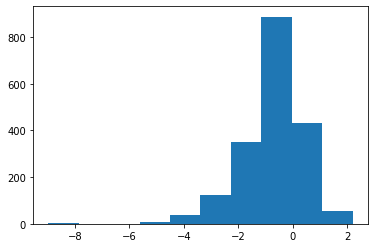

In [186]:
plt.hist(log_html)

In [187]:
#sqrt transformation

import numpy as np

sqr_html = np.sqrt(df1["html_ratio"])
print(sqr_html.skew())

0.9886998658239193


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([161., 457., 660., 381., 147.,  51.,  21.,  13.,   1.,   2.]),
 array([0.01123948, 0.30894796, 0.60665644, 0.90436492, 1.2020734 ,
        1.49978188, 1.79749036, 2.09519884, 2.39290732, 2.6906158 ,
        2.98832428]),
 <a list of 10 Patch objects>)

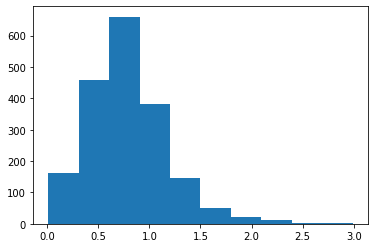

In [188]:
plt.hist(sqr_html)

In [189]:
max = df1['html_ratio'].quantile(0.95)
min = df1['html_ratio'].quantile(0.05)

In [190]:
max

1.5548172636132942

In [191]:
min

-1.4232834824271505

In [192]:

#df1[(df1['html_ratio']<min)]

In [193]:
#Outlier removal
#df1 = df1[(df1['html_ratio']<max) & (df1['html_ratio']>min)]

## **12. image_ratio**

In [194]:
#image_ratio

df1['image_ratio'].value_counts()

-1.000000    353
 0.000000     25
 0.724138     20
 0.250000     11
 0.500000     10
            ... 
 0.122658      1
 0.229426      1
 0.025000      1
 0.210366      1
 0.282609      1
Name: image_ratio, Length: 3149, dtype: int64

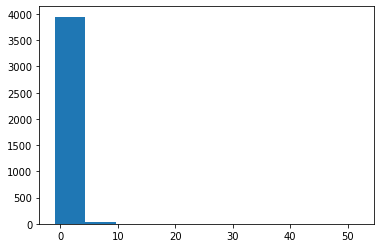

In [195]:
plt.hist(df1['image_ratio'])
plt.show()

In [196]:
#Normalization
image_ratio_norm = MinMaxScaler(df1["image_ratio"].min(),df1["image_ratio"].max())
df1['image_ratio'] = df1['image_ratio'].apply(image_ratio_norm.scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [197]:
#Standardization

image_ratio_std = df1["image_ratio"].apply(Standardizer(df1["image_ratio"].mean(), df1["image_ratio"].std()).scale)  
df1['image_ratio'] = image_ratio_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


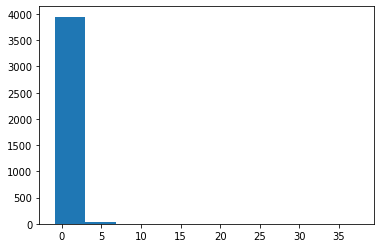

In [198]:
plt.hist(df1['image_ratio'])
plt.show()

Text(0, 0.5, 'image_ratio')

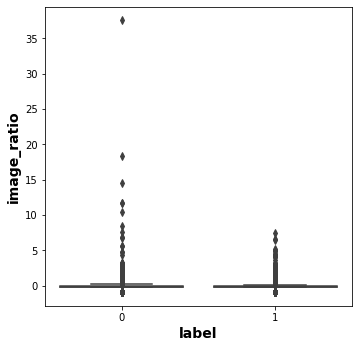

In [199]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='image_ratio', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('image_ratio', fontsize=14, fontweight='bold')

In [200]:
max = df1['image_ratio'].quantile(0.95)
min = df1['image_ratio'].quantile(0.05)

In [201]:
df1[(df1['image_ratio']<min)]

,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label,pd_lower,pd_spec_rem,link_new


In [202]:
#log transformation

import numpy as np

log_ir = np.log(df1["image_ratio"])
print(log_ir.skew())

-0.4347963673392983


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([  1.,   2.,  17.,  37., 119., 260., 313., 145.,  45.,   6.]),
 array([-9.72758309, -8.39232405, -7.057065  , -5.72180595, -4.3865469 ,
        -3.05128786, -1.71602881, -0.38076976,  0.95448929,  2.28974833,
         3.62500738]),
 <a list of 10 Patch objects>)

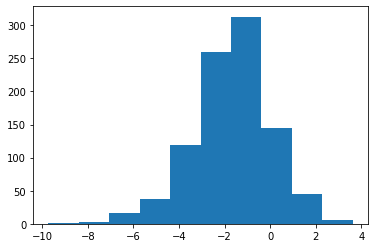

In [203]:
plt.hist(log_ir)

In [204]:
#sqrt transformation

import numpy as np

sqr_ir = np.sqrt(df1["image_ratio"])
print(sqr_ir.skew())

2.9359022874974263


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([639., 199.,  77.,  17.,   7.,   3.,   2.,   0.,   0.,   1.]),
 array([0.00772115, 0.61952556, 1.23132998, 1.84313439, 2.4549388 ,
        3.06674321, 3.67854762, 4.29035203, 4.90215644, 5.51396086,
        6.12576527]),
 <a list of 10 Patch objects>)

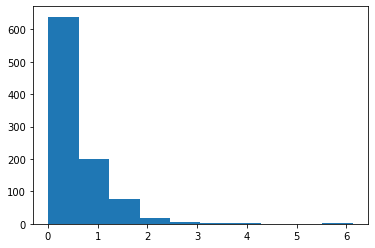

In [205]:
plt.hist(sqr_ir)

# 13. "link_word_score"

(array([ 483., 1007.,  821.,  551.,  437.,  306.,  183.,  123.,   59.,
          20.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

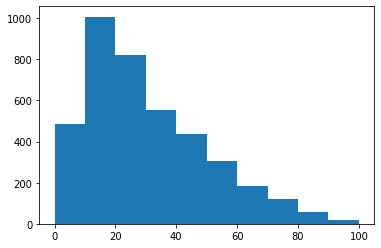

In [206]:
#link_word_score

plt.hist(df1['link_word_score'])

Text(0, 0.5, 'link_word_score')

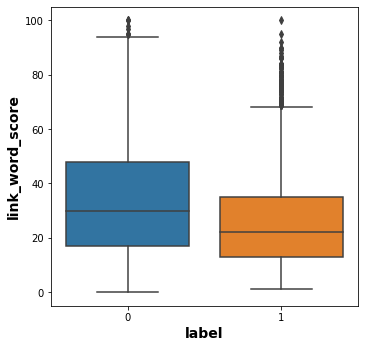

In [207]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='link_word_score', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('link_word_score', fontsize=14, fontweight='bold')

In [208]:
#Normalization
link_word_score_norm = MinMaxScaler(df1["link_word_score"].min(),df1["link_word_score"].max())
df1['link_word_score'] = df1['link_word_score'].apply(link_word_score_norm.scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [209]:
#Standardization

link_word_score_std = df1["link_word_score"].apply(Standardizer(df1["link_word_score"].mean(), df1["link_word_score"].std()).scale)  
df1['link_word_score'] = link_word_score_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(array([ 483., 1007.,  821.,  551.,  437.,  306.,  183.,  123.,   59.,
          20.]),
 array([-1.5285962 , -1.0202956 , -0.51199501, -0.00369442,  0.50460618,
         1.01290677,  1.52120737,  2.02950796,  2.53780855,  3.04610915,
         3.55440974]),
 <a list of 10 Patch objects>)

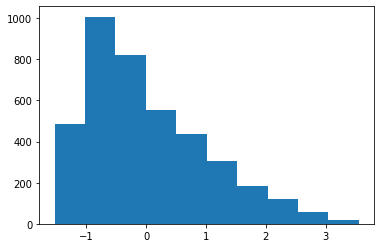

In [210]:
plt.hist(df1['link_word_score'])

Text(0, 0.5, 'link_word_score')

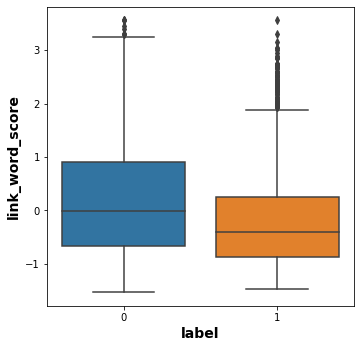

In [211]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='link_word_score', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('link_word_score', fontsize=14, fontweight='bold')

In [212]:
#Log transform 

import numpy as np

log_lws = np.log(df1["link_word_score"])
print(log_lws.skew())


-0.8347742838323742


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([ 66.,  52.,  55., 121., 152., 191., 281., 306., 249., 136.]),
 array([-3.05472579, -2.62243431, -2.19014283, -1.75785135, -1.32555987,
        -0.89326839, -0.46097691, -0.02868543,  0.40360605,  0.83589753,
         1.26818901]),
 <a list of 10 Patch objects>)

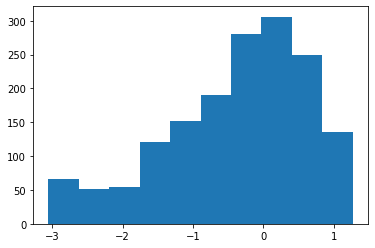

In [213]:
plt.hist(log_lws)

In [214]:
#sqrt transform

import numpy as np

sqr_lws = np.sqrt(df1["link_word_score"])
print(sqr_lws.skew())


0.14625967302840492


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([118., 230., 203., 236., 216., 221., 153., 135.,  75.,  22.]),
 array([0.21710745, 0.38392813, 0.5507488 , 0.71756948, 0.88439016,
        1.05121084, 1.21803152, 1.38485219, 1.55167287, 1.71849355,
        1.88531423]),
 <a list of 10 Patch objects>)

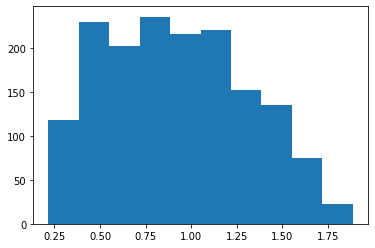

In [215]:
plt.hist(sqr_lws)

In [216]:
max = df1['link_word_score'].quantile(0.99)
min = df1['link_word_score'].quantile(0.05)

In [217]:
#df1[(df1['link_word_score']>max)]

In [218]:
#df1[(df1['link_word_score']<min)]

In [219]:
#Outlier removal 

#df1 = df1[(df1['link_word_score']<max) & (df1['link_word_score']>min)]

# 14. "non_markup_alphanumeric_characters"

In [220]:
#non_markup_alphanumeric_characters
df1['non_markup_alphanumeric_characters'].value_counts()


423      14
159       5
780       5
155       5
4296      4
         ..
7040      1
1359      1
32840     1
13435     1
7637      1
Name: non_markup_alphanumeric_characters, Length: 3324, dtype: int64

(array([3.755e+03, 1.650e+02, 4.500e+01, 1.500e+01, 4.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([     0.,  16845.,  33690.,  50535.,  67380.,  84225., 101070.,
        117915., 134760., 151605., 168450.]),
 <a list of 10 Patch objects>)

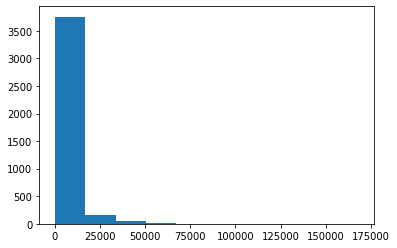

In [221]:
plt.hist(df1['non_markup_alphanumeric_characters'])

In [222]:
#Normalization
nmac_norm = MinMaxScaler(df1["non_markup_alphanumeric_characters"].min(),df1["non_markup_alphanumeric_characters"].max())
df1['non_markup_alphanumeric_characters'] = df1['non_markup_alphanumeric_characters'].apply(nmac_norm.scale)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [223]:

#Standardization

nmac_std = df1["non_markup_alphanumeric_characters"].apply(Standardizer(df1["non_markup_alphanumeric_characters"].mean(), df1["non_markup_alphanumeric_characters"].std()).scale)  
df1['non_markup_alphanumeric_characters'] = nmac_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [224]:
#LOg_transform

log_nmac = np.log(df1["non_markup_alphanumeric_characters"])
print(log_nmac.skew())

-0.6861249658553448


(array([  1.,   3.,   6.,  19.,  63., 196., 361., 344., 159.,  17.]),
 array([-9.09795044, -7.89286016, -6.68776988, -5.4826796 , -4.27758931,
        -3.07249903, -1.86740875, -0.66231847,  0.54277181,  1.74786209,
         2.95295237]),
 <a list of 10 Patch objects>)

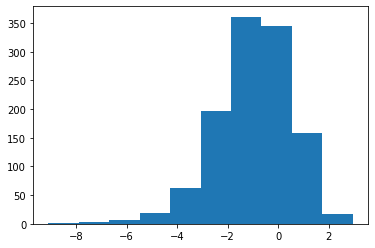

In [225]:
plt.hist(log_nmac)

In [226]:
#sqrt transform


import numpy as np

sqrt_nmac = np.sqrt(df1["non_markup_alphanumeric_characters"])
print(sqrt_nmac.skew())

1.6020206938500494


(array([352., 445., 197., 101.,  41.,  23.,   5.,   3.,   1.,   1.]),
 array([0.01057804, 0.44726954, 0.88396103, 1.32065253, 1.75734403,
        2.19403552, 2.63072702, 3.06741852, 3.50411001, 3.94080151,
        4.37749301]),
 <a list of 10 Patch objects>)

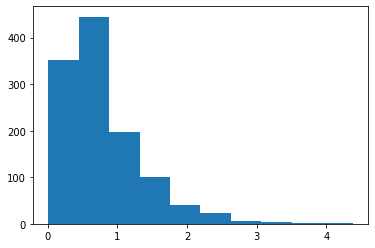

In [227]:
plt.hist(sqrt_nmac)

(array([3.755e+03, 1.650e+02, 4.500e+01, 1.500e+01, 4.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.69138358,  1.29399928,  3.27938214,  5.264765  ,  7.25014786,
         9.23553072, 11.22091358, 13.20629644, 15.1916793 , 17.17706216,
        19.16244502]),
 <a list of 10 Patch objects>)

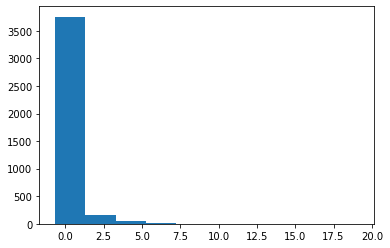

In [228]:
plt.hist(df1['non_markup_alphanumeric_characters'])

In [229]:
max = df1['non_markup_alphanumeric_characters'].quantile(0.95)
min = df1['non_markup_alphanumeric_characters'].quantile(0.05)

In [230]:
max

1.5053962955690128

In [231]:
min

-0.6540213713742228

In [232]:
#df1[(df1['non_markup_alphanumeric_characters']>max)]

In [233]:
#Outlier removal 

#df1 = df1[(df1['non_markup_alphanumeric_characters']<max) & (df1['non_markup_alphanumeric_characters']>min)]

## **15. "count_of_links"**

In [234]:
#count_of_links

df1['count_of_links'].value_counts()

142    34
117    30
120    26
161    26
121    26
       ..
472     1
508     1
484     1
455     1
473     1
Name: count_of_links, Length: 587, dtype: int64

(array([2.338e+03, 1.137e+03, 3.370e+02, 1.140e+02, 4.700e+01, 9.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 3.000e+00]),
 array([1.0000e+00, 1.6210e+02, 3.2320e+02, 4.8430e+02, 6.4540e+02,
        8.0650e+02, 9.6760e+02, 1.1287e+03, 1.2898e+03, 1.4509e+03,
        1.6120e+03]),
 <a list of 10 Patch objects>)

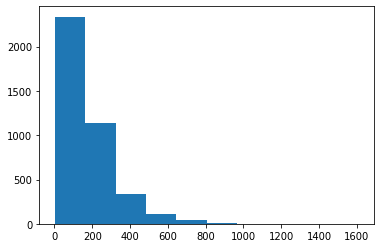

In [235]:
plt.hist(df1['count_of_links'])

In [236]:
#Normalization
col_norm = MinMaxScaler(df1["count_of_links"].min(),df1["count_of_links"].max())
df1['count_of_links'] = df1['count_of_links'].apply(col_norm.scale)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [237]:
#Standardization

col_std = df1["count_of_links"].apply(Standardizer(df1["count_of_links"].mean(), df1["count_of_links"].std()).scale)  
df['count_of_links'] = col_std

(array([2.338e+03, 1.137e+03, 3.370e+02, 1.140e+02, 4.700e+01, 9.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 3.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

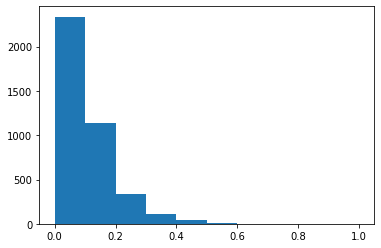

In [238]:
plt.hist(df1['count_of_links'])

Text(0, 0.5, 'count_of_links')

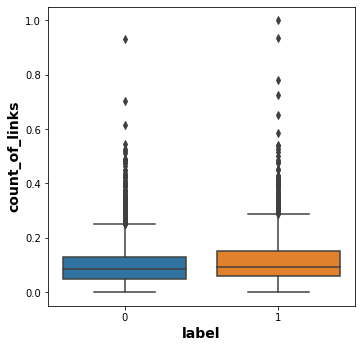

In [239]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='count_of_links', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('count_of_links', fontsize=14, fontweight='bold')

In [240]:
#LOg transformation 
import numpy as np

log_col = np.log(df1["count_of_links"])
print(log_col.skew())

nan


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [241]:
#plt.hist(log_col)

In [242]:
#sqrt transform

import numpy as np

sqrt_col = np.sqrt(df1["count_of_links"])
print(sqrt_col.skew())

0.6744021231951938


(array([ 127.,  523., 1396., 1151.,  499.,  206.,   69.,   12.,    4.,
           3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

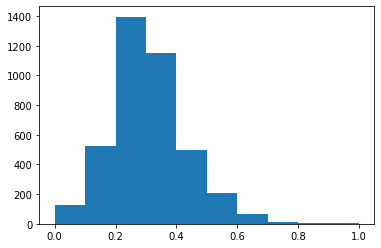

In [243]:
plt.hist(sqrt_col)

# 16. "parametrized_link_ratio"

(array([1800.,  937.,  563.,  283.,  157.,   95.,   66.,   38.,   29.,
          22.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

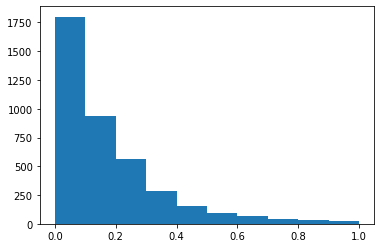

In [244]:
#parametrized_link_ratio

plt.hist(df1['parametrized_link_ratio'])

Text(0, 0.5, 'parametrized_link_ratio')

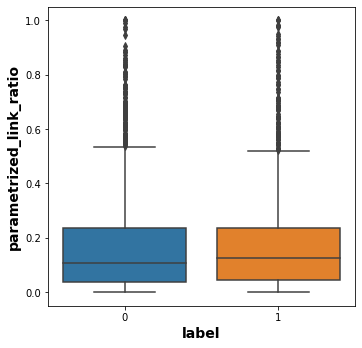

In [245]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='parametrized_link_ratio', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('parametrized_link_ratio', fontsize=14, fontweight='bold')

In [246]:
#Normalization
plr_norm = MinMaxScaler(df1["parametrized_link_ratio"].min(),df1["parametrized_link_ratio"].max())
df1['parametrized_link_ratio'] = df1['parametrized_link_ratio'].apply(plr_norm.scale)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [247]:
#Standardization

plr_std = df1["parametrized_link_ratio"].apply(Standardizer(df1["parametrized_link_ratio"].mean(), df1["parametrized_link_ratio"].std()).scale)  
df1['parametrized_link_ratio'] = plr_std


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(array([1800.,  937.,  561.,  285.,  157.,   93.,   67.,   39.,   29.,
          22.]),
 array([-0.95664349, -0.39718933,  0.16226483,  0.72171899,  1.28117315,
         1.84062731,  2.40008147,  2.95953563,  3.51898979,  4.07844395,
         4.6378981 ]),
 <a list of 10 Patch objects>)

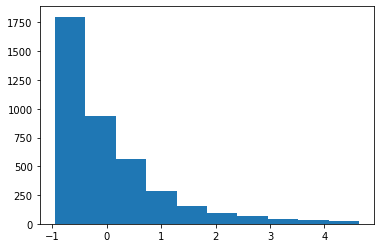

In [248]:
plt.hist(df1['parametrized_link_ratio'])

In [249]:
#LOg transform 

import numpy as np

plr_col = np.log(df1["parametrized_link_ratio"])
print(plr_col.skew())


-1.1847841410428679


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([  1.,   2.,   3.,  12.,  19.,  65., 177., 376., 512., 315.]),
 array([-8.98420854, -7.93236156, -6.88051458, -5.8286676 , -4.77682062,
        -3.72497364, -2.67312666, -1.62127967, -0.56943269,  0.48241429,
         1.53426127]),
 <a list of 10 Patch objects>)

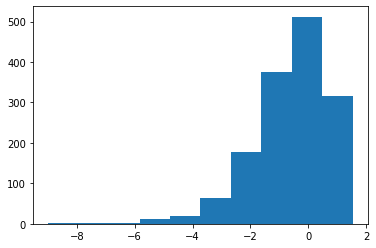

In [250]:
plt.hist(plr_col)

In [251]:
#sqrt transform 

import numpy as np

plr_sqr = np.sqrt(df1["parametrized_link_ratio"])
print(plr_sqr.skew())


0.5557902102871073


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([ 71., 203., 266., 272., 212., 163., 124.,  83.,  50.,  38.]),
 array([0.01119706, 0.22543515, 0.43967324, 0.65391133, 0.86814943,
        1.08238752, 1.29662561, 1.5108637 , 1.72510179, 1.93933989,
        2.15357798]),
 <a list of 10 Patch objects>)

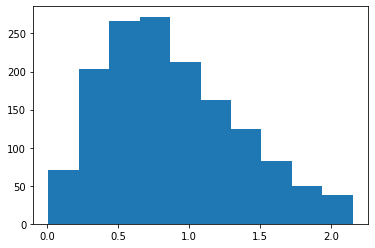

In [252]:
plt.hist(plr_sqr)

# 17. "spelling_mistakes_ratio"

(array([2.548e+03, 1.241e+03, 1.090e+02, 3.500e+01, 2.600e+01, 1.800e+01,
        3.000e+00, 1.000e+00, 0.000e+00, 9.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

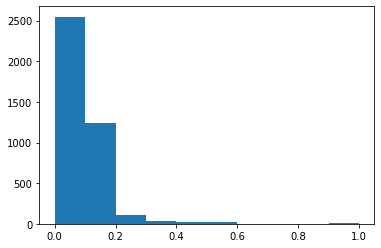

In [253]:
#spelling_mistakes_ratio

plt.hist(df1['spelling_mistakes_ratio'])

Text(0, 0.5, 'spelling_mistakes_ratio')

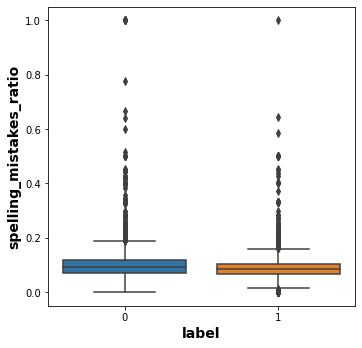

In [254]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='label', y='spelling_mistakes_ratio', data = df1)

plt.xlabel('label', fontsize=14, fontweight='bold')
plt.ylabel('spelling_mistakes_ratio', fontsize=14, fontweight='bold')

In [255]:
#LOg transform 

import numpy as np

smr_log = np.log(df1["spelling_mistakes_ratio"])
print(smr_log.skew())


nan


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [256]:
#SQRT transform

smr_sqrt = np.sqrt(df1["spelling_mistakes_ratio"])
print(smr_sqrt.skew())


1.3379206696468149


(array([  93.,  156., 1811., 1615.,  185.,   69.,   30.,   18.,    4.,
           9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

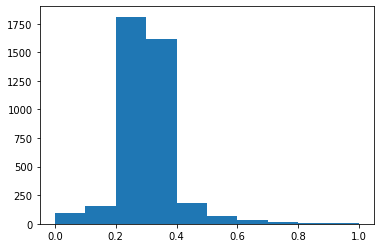

In [257]:
plt.hist(smr_sqrt)

# EDA categorial features

In [258]:
cat_features

['link',
 'page_description',
 'alchemy_category',
 'alchemy_category_score',
 'is_news',
 'news_front_page',
 'pd_lower',
 'pd_spec_rem',
 'link_new']

In [259]:
discrete_feature

['frame_based',
 'has_domain_link',
 'lengthy_link_domain',
 'number_of_words_in_url',
 'label']

In [260]:
#link','page_description','alchemy_category' already done in starting

# 1. news_front_page

0    0.952609
1    0.047391
Name: news_front_page, dtype: float64


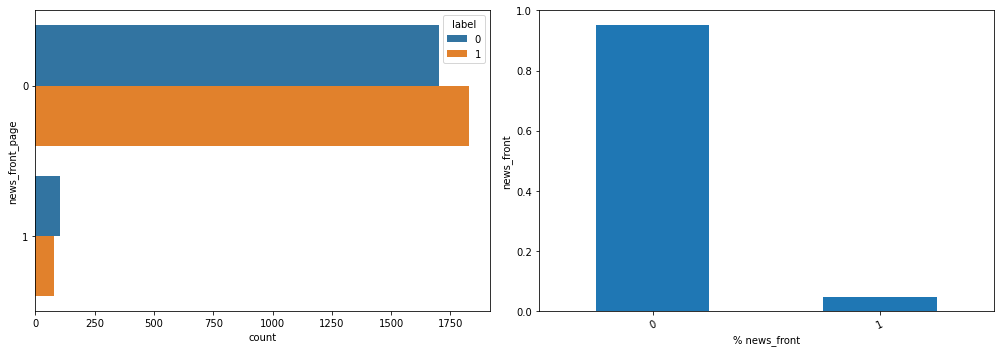

In [261]:
stats_target = df1['news_front_page'].value_counts(normalize=True)
print(stats_target)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=df,y='news_front_page',hue='label')
plt.subplot(1,2,2)
stats_target.plot.bar(rot=25)
plt.ylabel('news_front')
plt.xlabel('% news_front')
plt.tight_layout()
plt.show()

## **2. is_news**

1    1.0
Name: is_news, dtype: float64


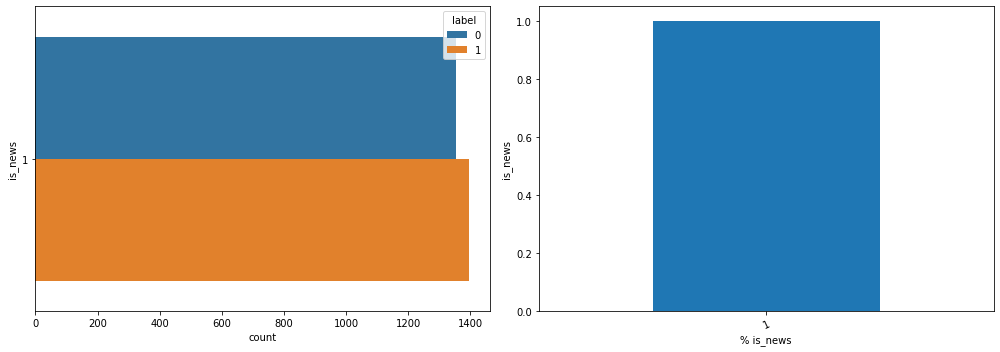

In [262]:
stats_target = df1['is_news'].value_counts(normalize=True)
print(stats_target)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=df,y='is_news',hue='label')
plt.subplot(1,2,2)
stats_target.plot.bar(rot=25)
plt.ylabel('is_news')
plt.xlabel('% is_news')
plt.tight_layout()
plt.show()

# **3. "news_front_page" **

# **4. alchemy_category_score**

In [263]:
#Imputing null values in 'alchemy_category_score' with mean  
x = (df['alchemy_category_score'].astype('float64')).mean()

In [264]:
df['alchemy_category_score'].fillna(x)

0       0.471752
1       0.885088
2       0.716379
3       0.562999
4       0.893246
          ...   
4432    0.764237
4433    0.604245
4434    0.159831
4435     0.84594
4436     0.93526
Name: alchemy_category_score, Length: 4437, dtype: object

In [265]:
min_value = df['alchemy_category_score'].astype('float64').min()
max_value = df['alchemy_category_score'].astype('float64').max()
print(min_value)
print(max_value)

0.0708333
0.999274


In [266]:
import numpy as np
bins_alch = np.linspace(min_value,max_value,4)
bins_alch

array([0.0708333 , 0.38031353, 0.68979377, 0.999274  ])

In [267]:
labels_alch = ['0.07to0.38','0.38to0.68','0.68to0.99']

In [268]:
df['bins_alch'] = pd.cut(df['alchemy_category_score'].astype('float64'), bins=bins_alch, labels=labels_alch, include_lowest=True)

0.38to0.68    0.421711
0.68to0.99    0.400658
0.07to0.38    0.177632
Name: bins_alch, dtype: float64


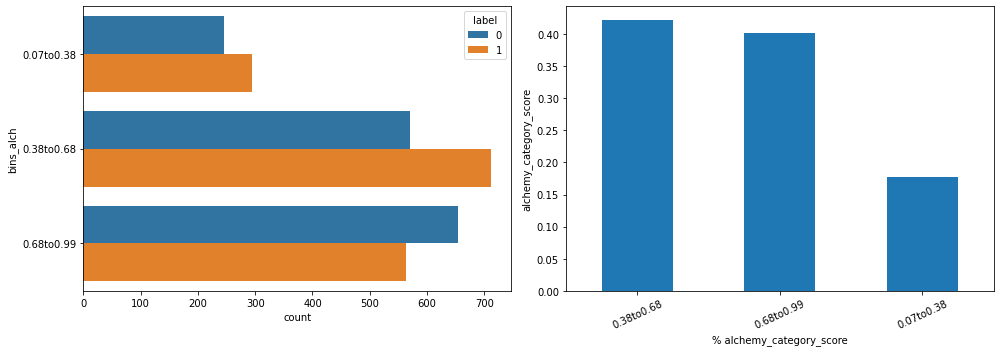

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

stats_target = df['bins_alch'].value_counts(normalize=True)
print(stats_target)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=df,y='bins_alch',hue='label')
plt.subplot(1,2,2)
stats_target.plot.bar(rot=25)
plt.ylabel('alchemy_category_score')
plt.xlabel('% alchemy_category_score')
plt.tight_layout()
plt.show()